In [6]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

features_map = {
    "mva": ['BDT Discriminator', 30, 0, 1],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 50, 110, 160],
    "met": ['$E^{miss}_{T}$ [GeV]', 30, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 30, 26, 200], 
    "ept": ['$p_{T}^{e}$', 30, 24, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt_Per_e_m_Mass": ['$p_{T}^{e\mu}/m_{e\mu}$', 30, 0.15, 1],
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 30, 0, 200],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 30, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaPhi_em_met": ['$\Delta \phi[e\mu, MET]$', 30, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "e_m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 30, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 30, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 30, 30, 100], 
    "j2Eta": ['$\eta^{j_{2}}$', 30, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 30, 0, 450], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 40, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 50, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 30, 0, 4.5], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 30, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 30, -6, 6], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 50, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "Rpt2": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 30, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 40, 60, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
    "njets": ['Number of jets', 6, 0, 6],
}
feature_names = ['empt_Per_e_m_Mass', 'mpt', 'ept', 'mpt_Per_e_m_Mass', 'ept_Per_e_m_Mass', 'mEta', 'eEta', 'njets', 'met', 'DeltaEta_e_m', 'empt', 'DeltaPhi_em_met', 'j1pt', 'j2pt', 'DeltaEta_j1_em', 'j1Eta', 'j2Eta', 'DeltaEta_j1_j2', 'j1_j2_mass', 'Ht_had', 'Rpt', 'pt_cen_Deltapt', 'Rpt2']

In [7]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP', '2017', '2016postVFP','2018']
var_dict = {}
for year in years:
    print(f'Processing {year}')
    for subsample in ['tt', 'diboson', 'others']:
        result = load(f"../results/{year}/makeDF/output_testv9_{subsample}.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            if varName in feature_names+['label', 'e_m_Mass', 'opp_charge', 'weight']:
                if varName in var_dict:
                    var_dict[varName] = np.append(var_dict[varName],result[varName].value)
                else:
                    var_dict[varName] = result[varName].value
df = pd.DataFrame(var_dict)

Processing 2016preVFP
Processing 2017
Processing 2016postVFP
Processing 2018


In [8]:
data_clean = df[df.opp_charge.eq(1)]
data_clean['j1_j2_mass'].replace(0, np.nan, inplace=True)
data_clean['j1pt'].replace(0, np.nan, inplace=True)
data_clean['j2pt'].replace(0, np.nan, inplace=True)

data_clean.insert(0, 'empt_Per_e_m_Mass', data_clean['empt']/data_clean['e_m_Mass'])
data_clean.insert(0, 'Rpt2', data_clean['Rpt']*(data_clean['j1pt']+data_clean['j2pt']+data_clean['ept']+data_clean['mpt'])/(data_clean['j1pt']+data_clean['j2pt']+data_clean['empt']))
data_clean.insert(0, 'mpt_Per_e_m_Mass', data_clean['mpt']/data_clean['e_m_Mass'])
data_clean.insert(0, 'ept_Per_e_m_Mass', data_clean['ept']/data_clean['e_m_Mass'])

data_bkg = data_clean

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:526: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1)


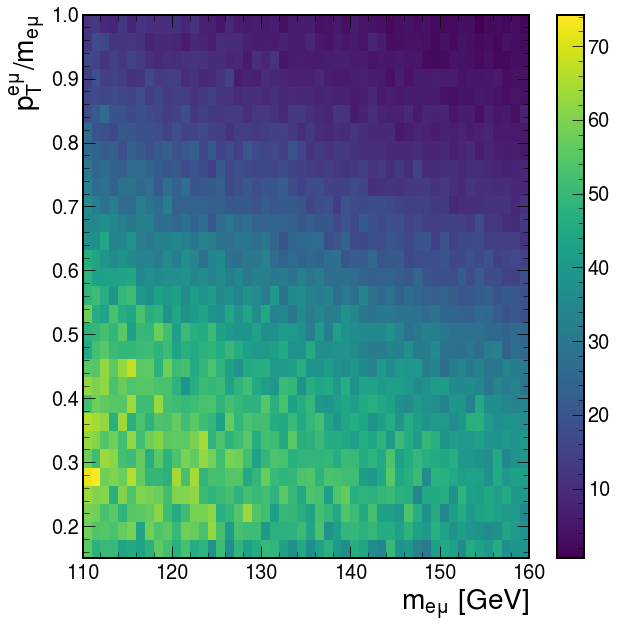

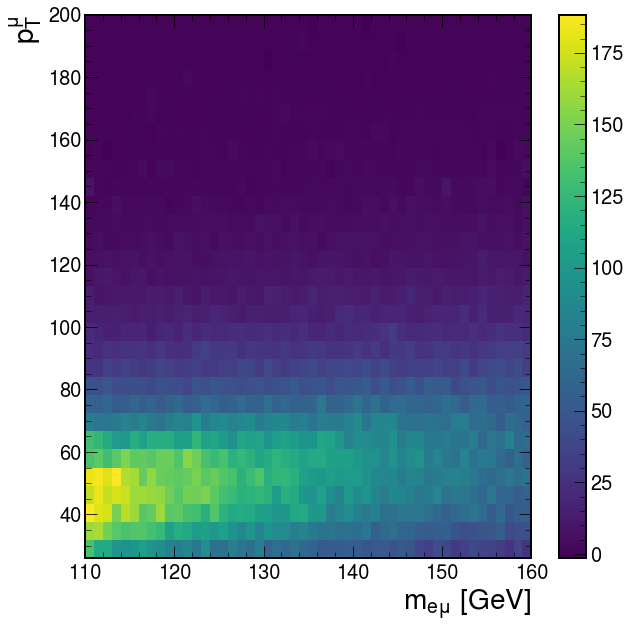

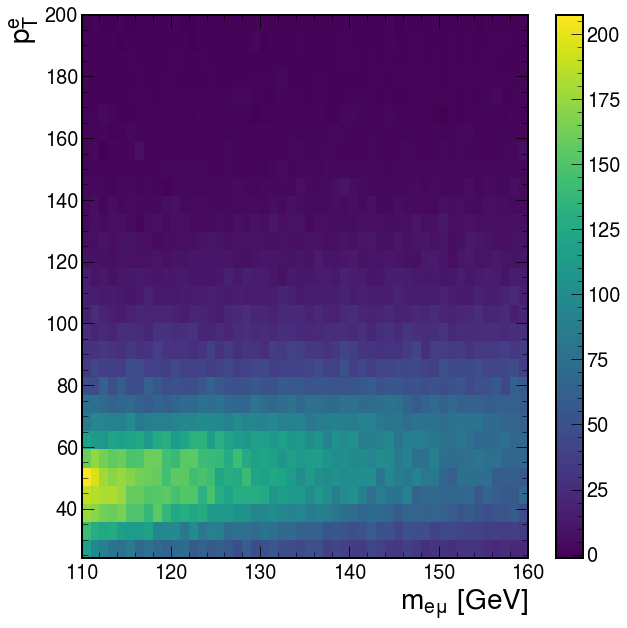

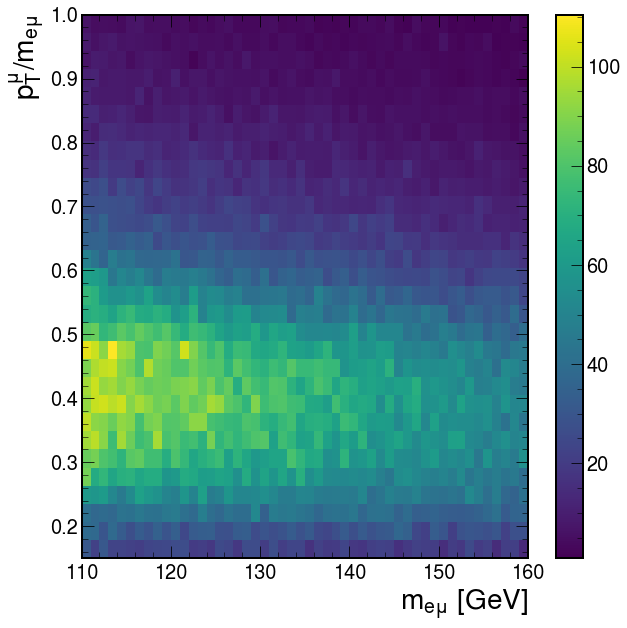

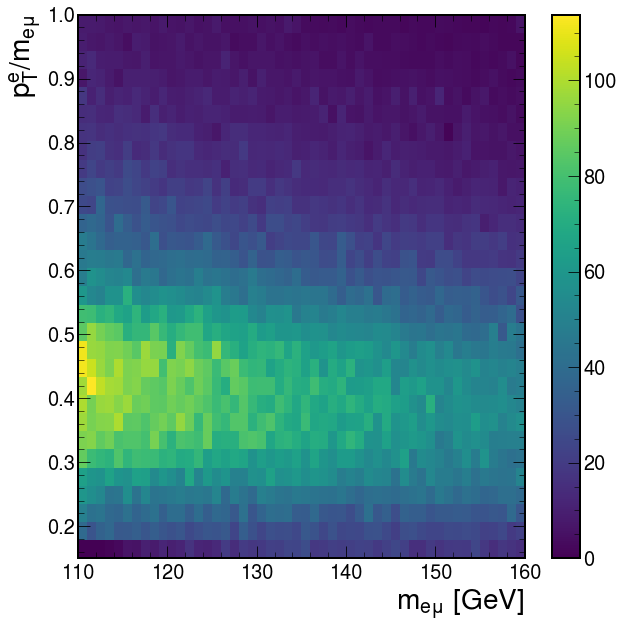

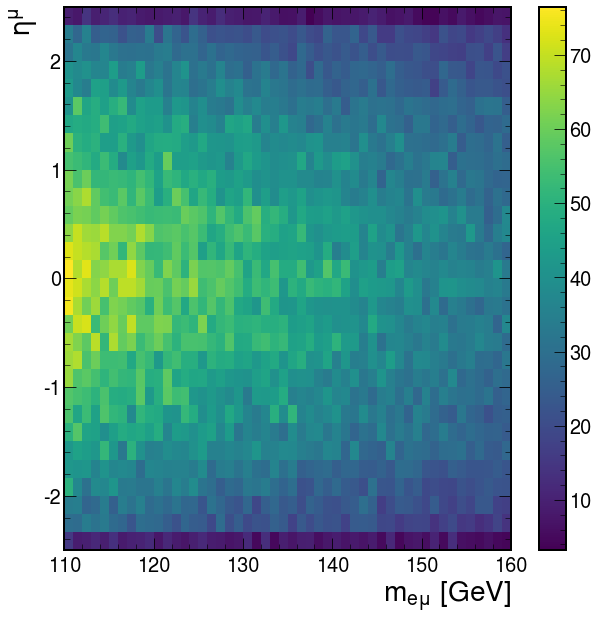

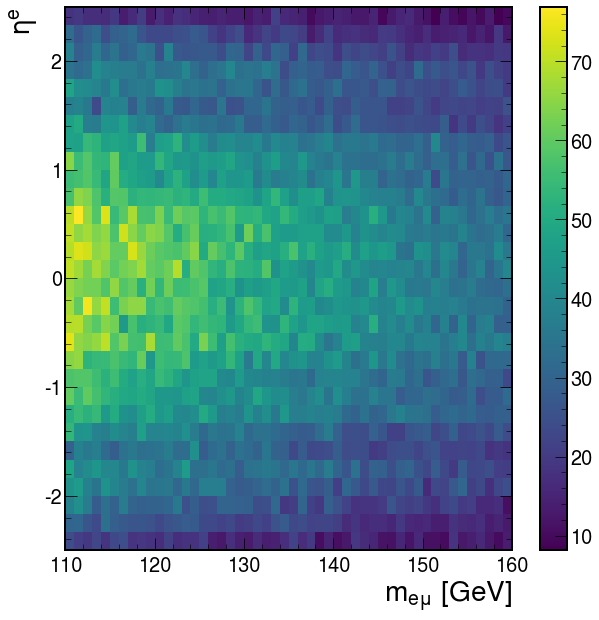

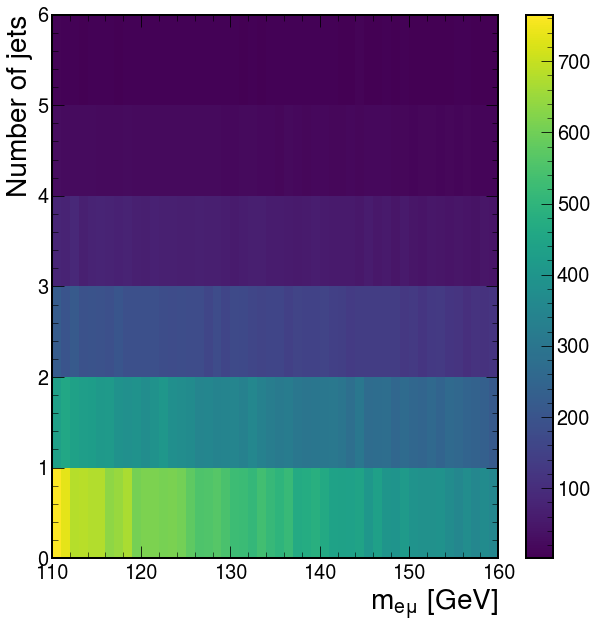

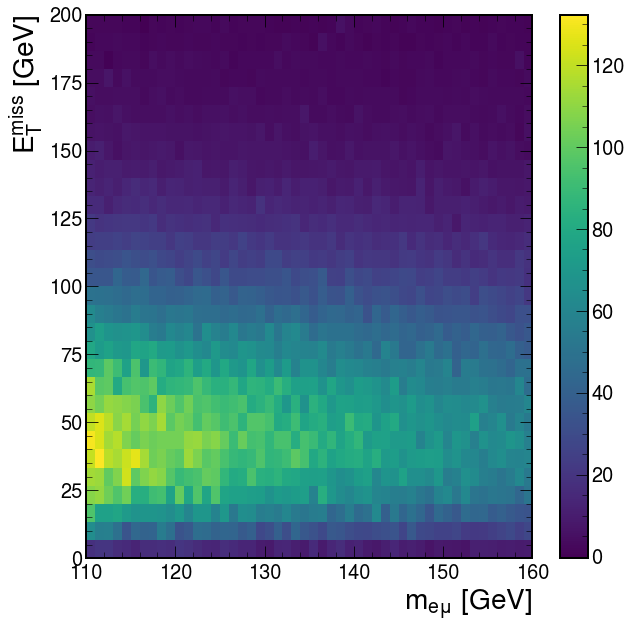

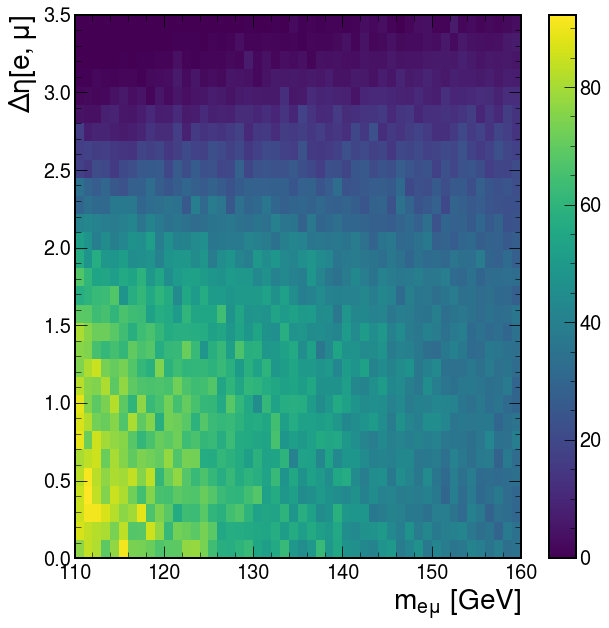

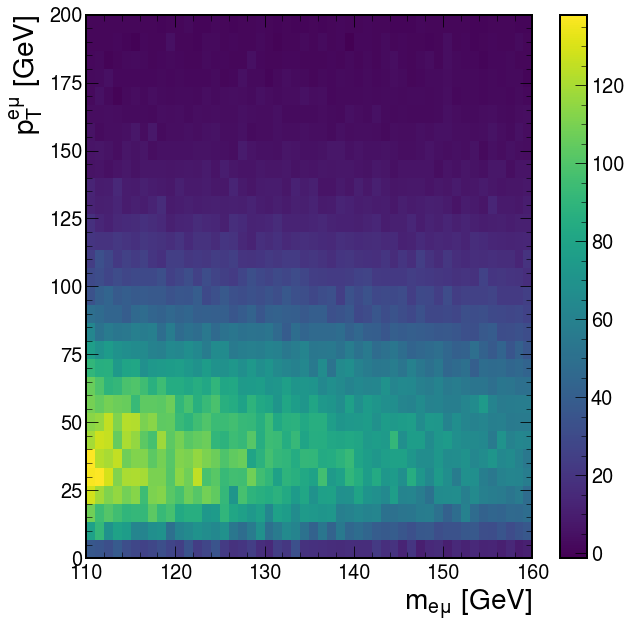

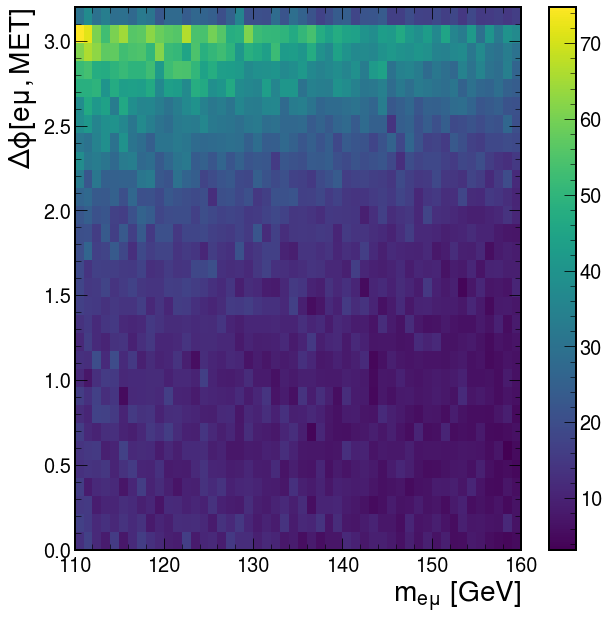

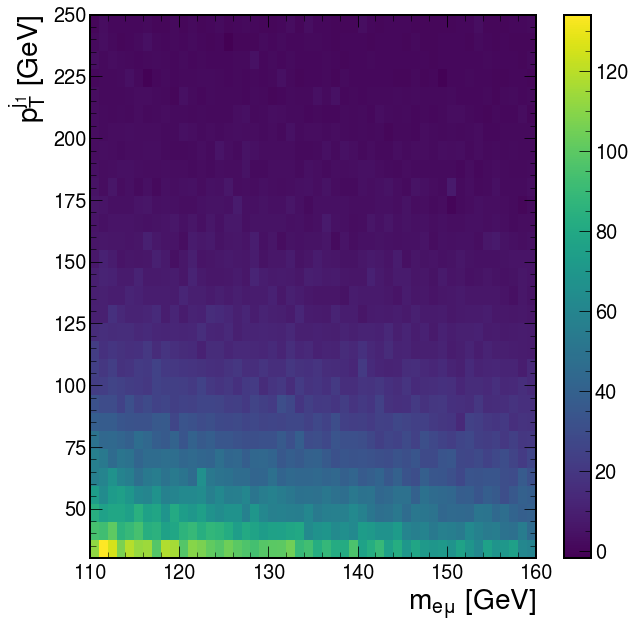

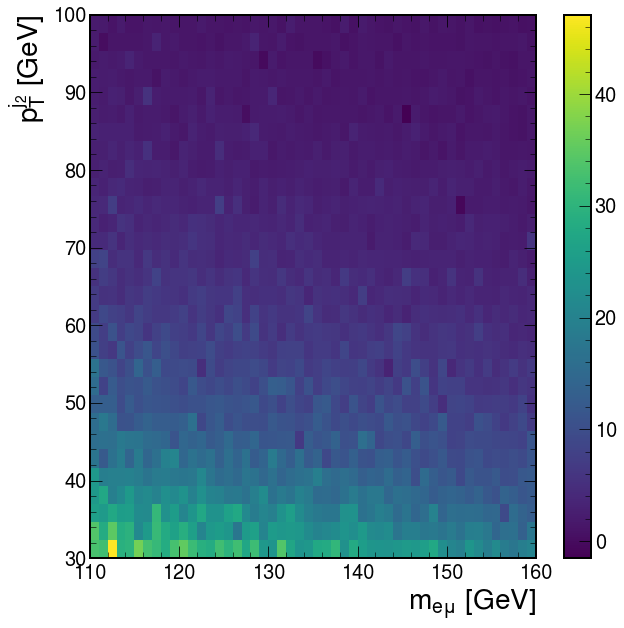

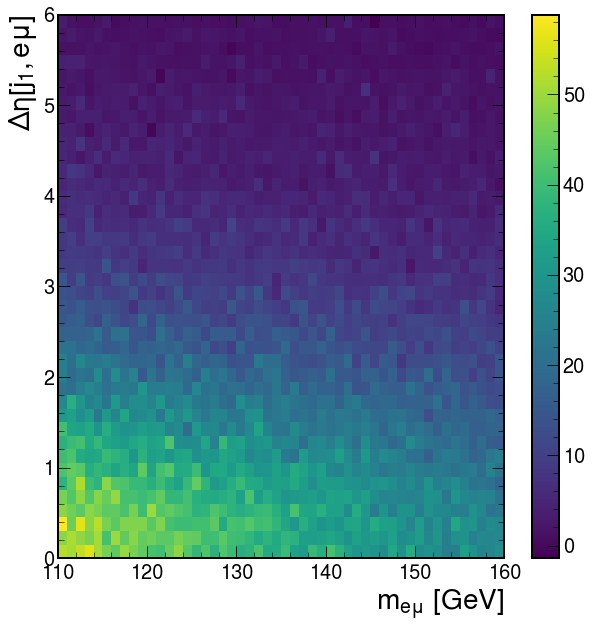

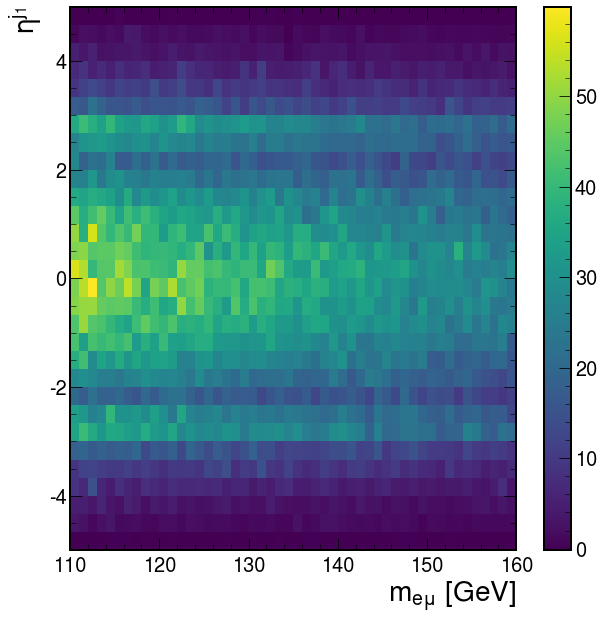

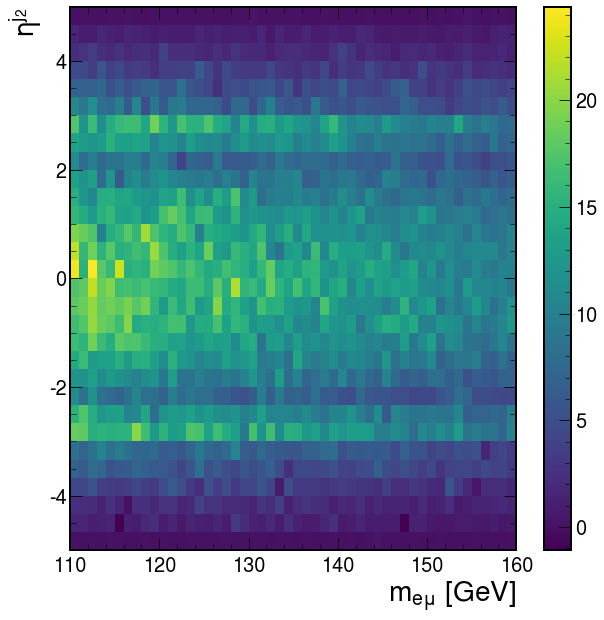

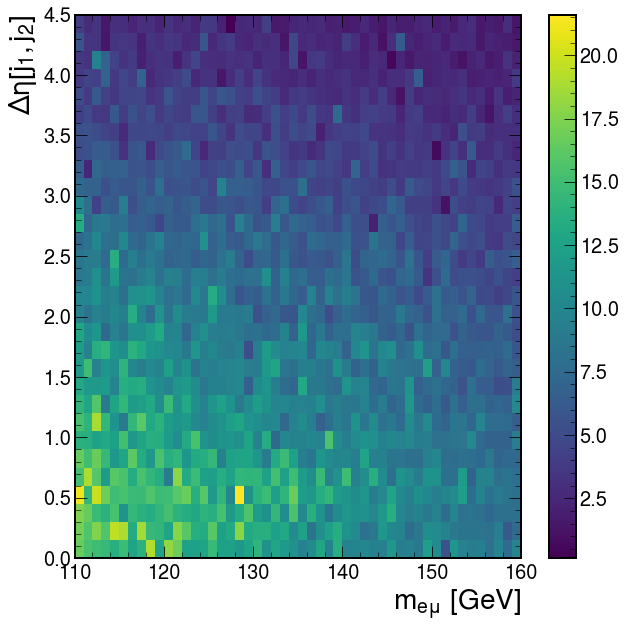

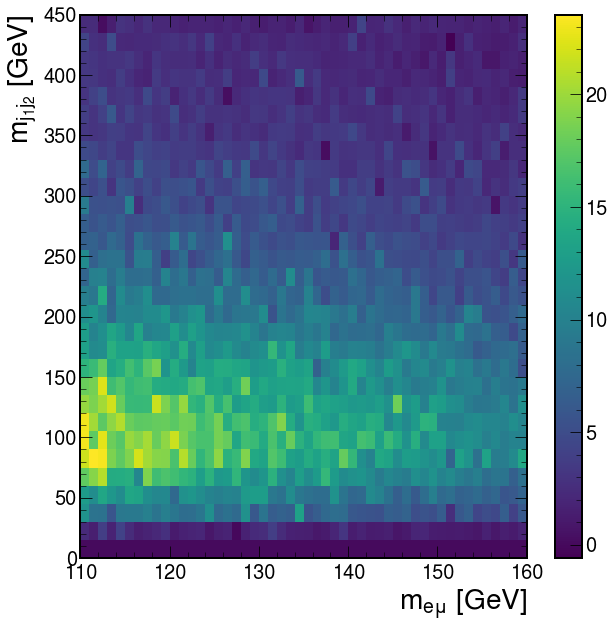

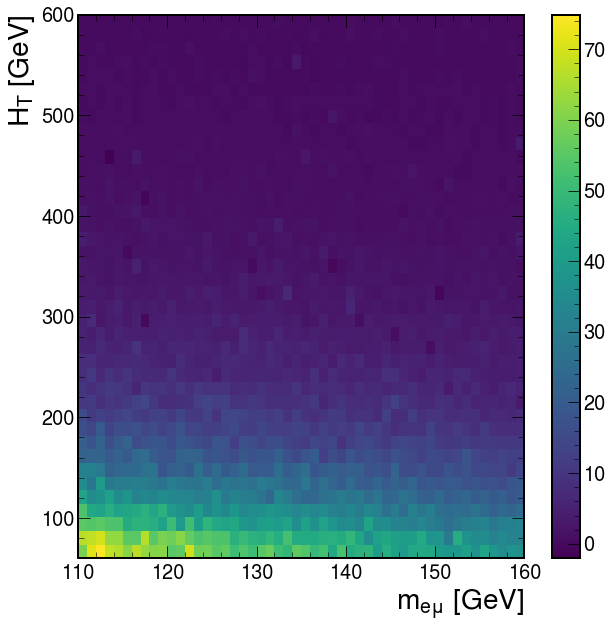

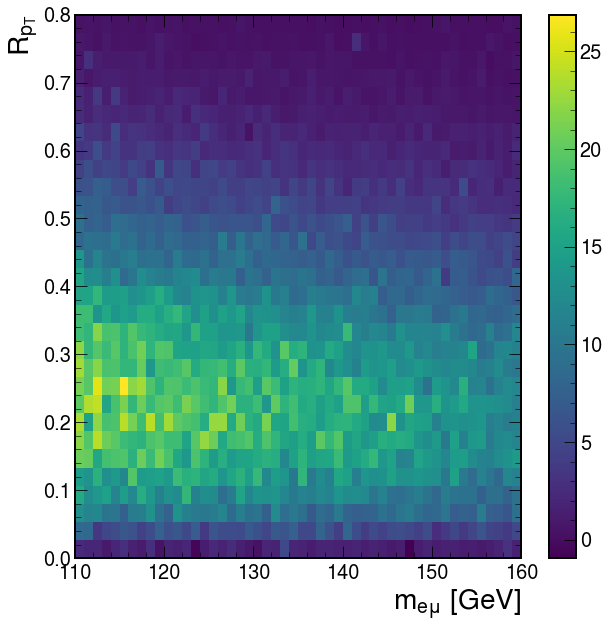

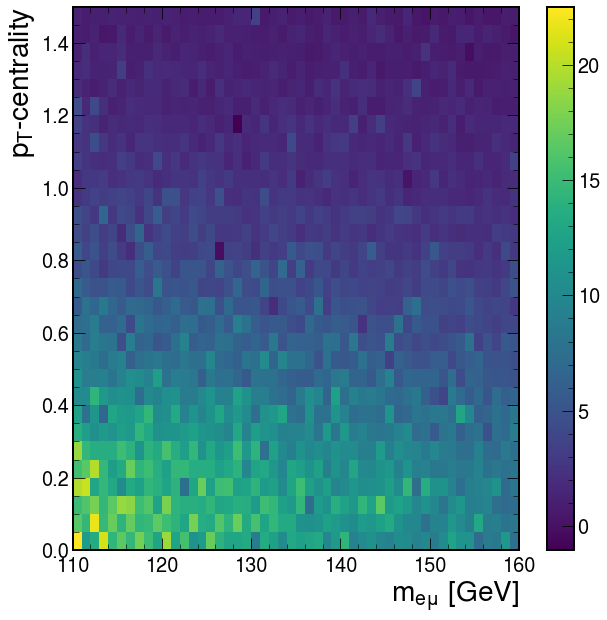

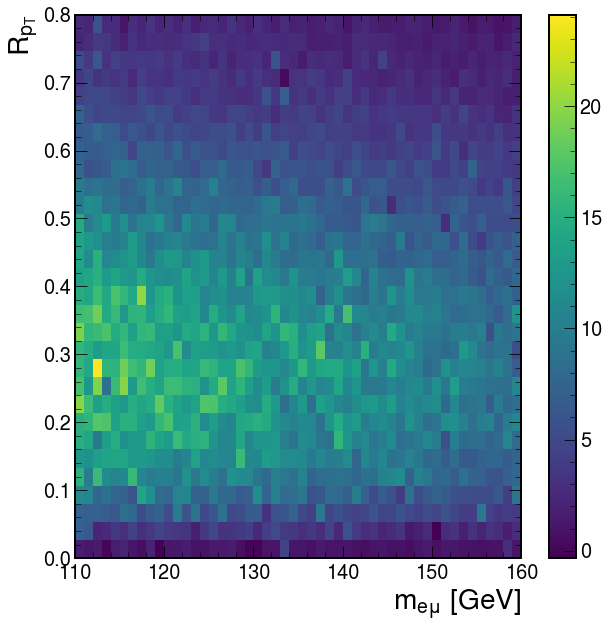

In [8]:
from coffea import hist
h = {}
for feature_name in feature_names:
    h[feature_name] = hist.Hist("",
                        hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 50, 110, 160),
                        hist.Bin(feature_name, *features_map[feature_name])
                      )
    args = {'e_m_Mass':data_bkg['e_m_Mass'].to_numpy(), feature_name:data_bkg[feature_name].to_numpy(), 'weight':data_bkg['weight'].to_numpy() }
    h[feature_name].fill(**args)
    hist.plot2d(h[feature_name], xaxis='e_m_Mass')

/tmp/ipykernel_1387338/384305392.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(


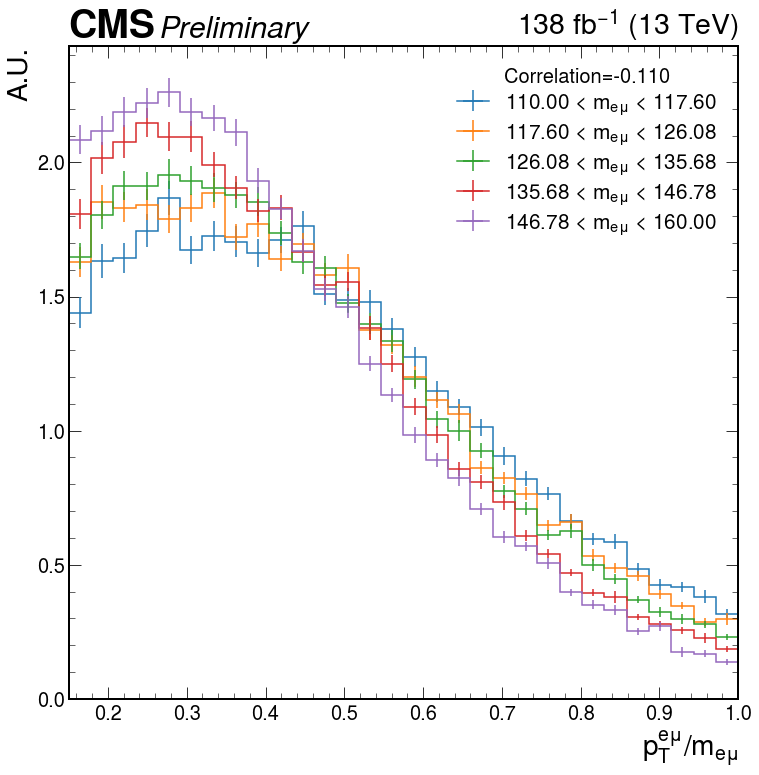

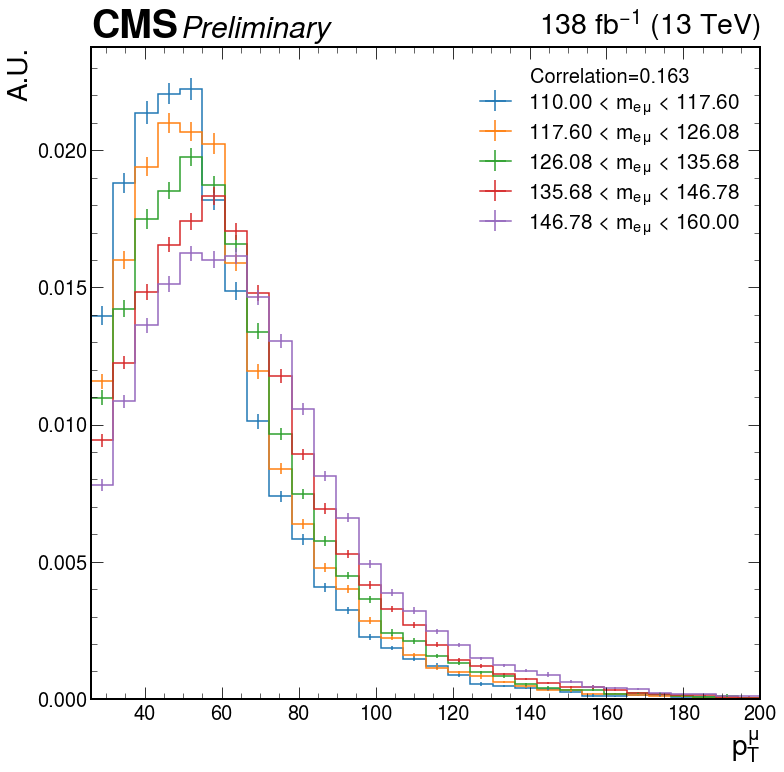

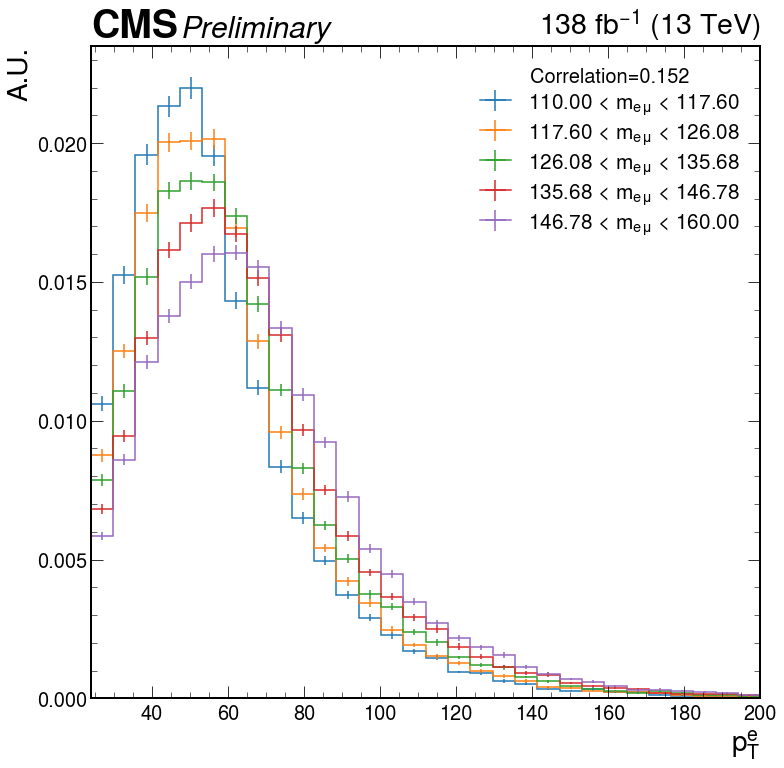

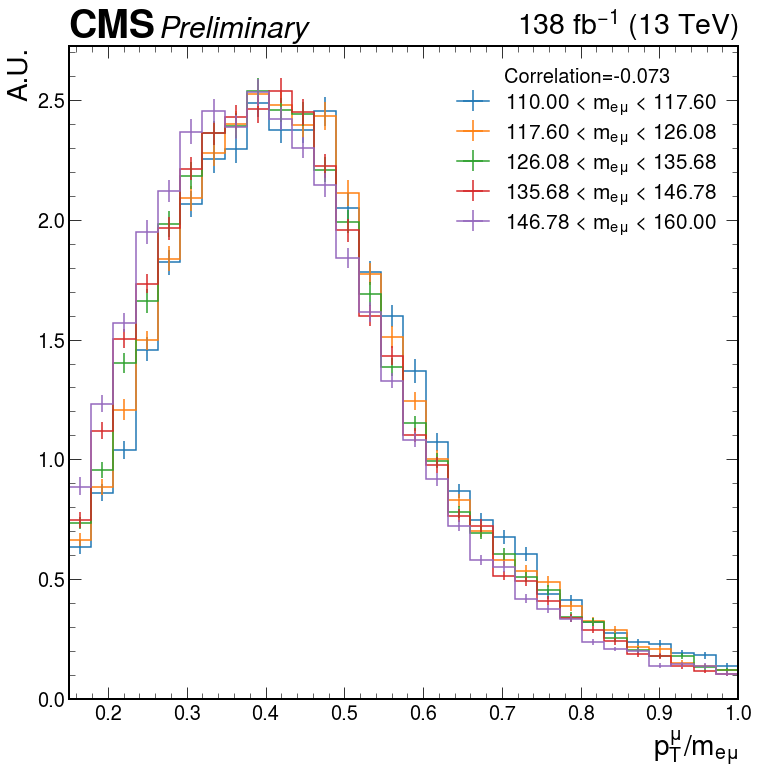

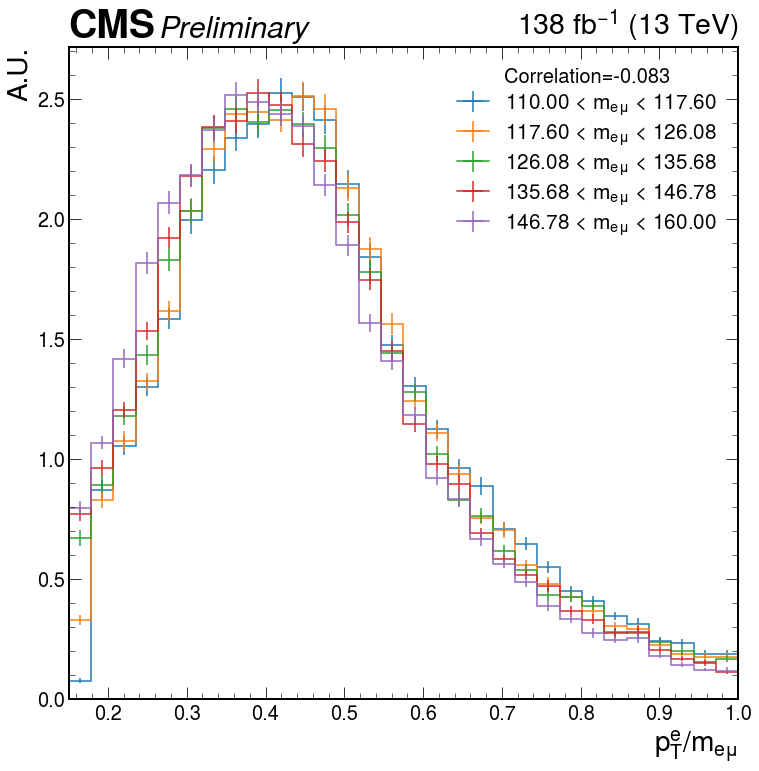

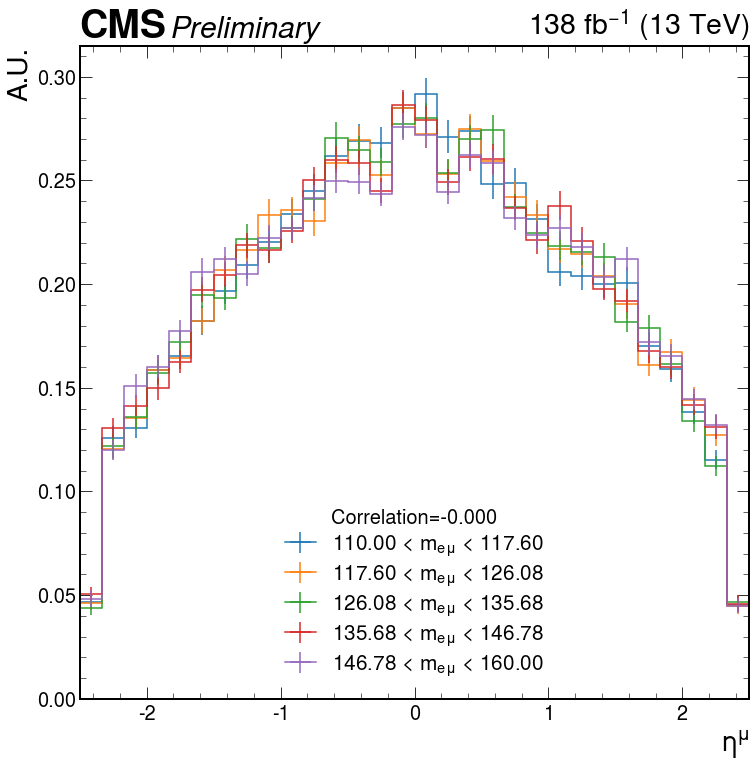

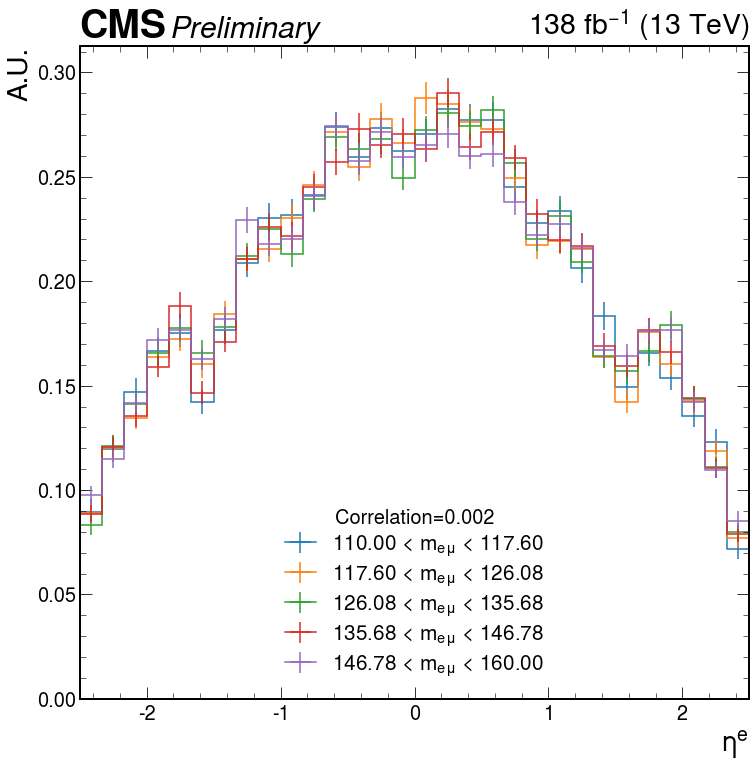

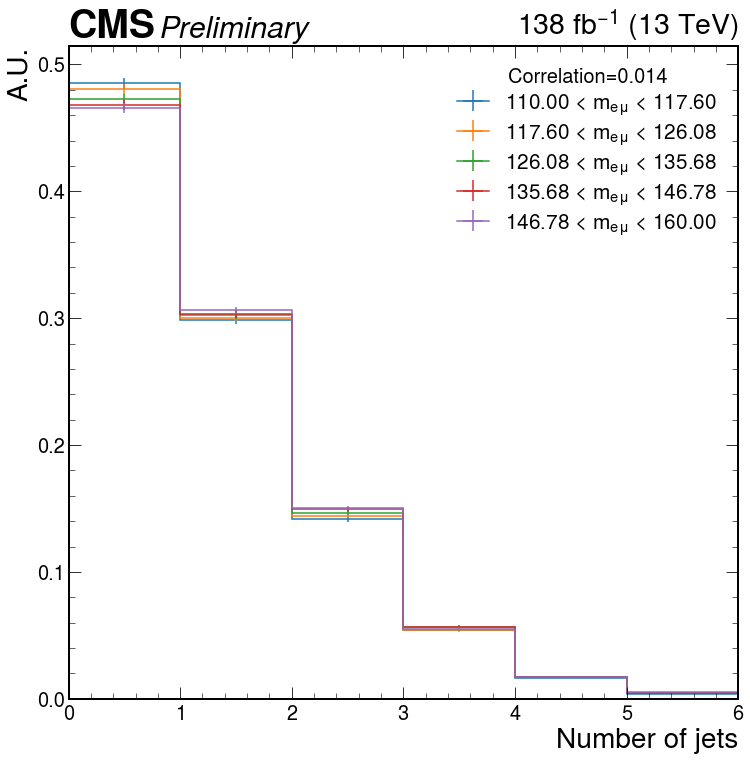

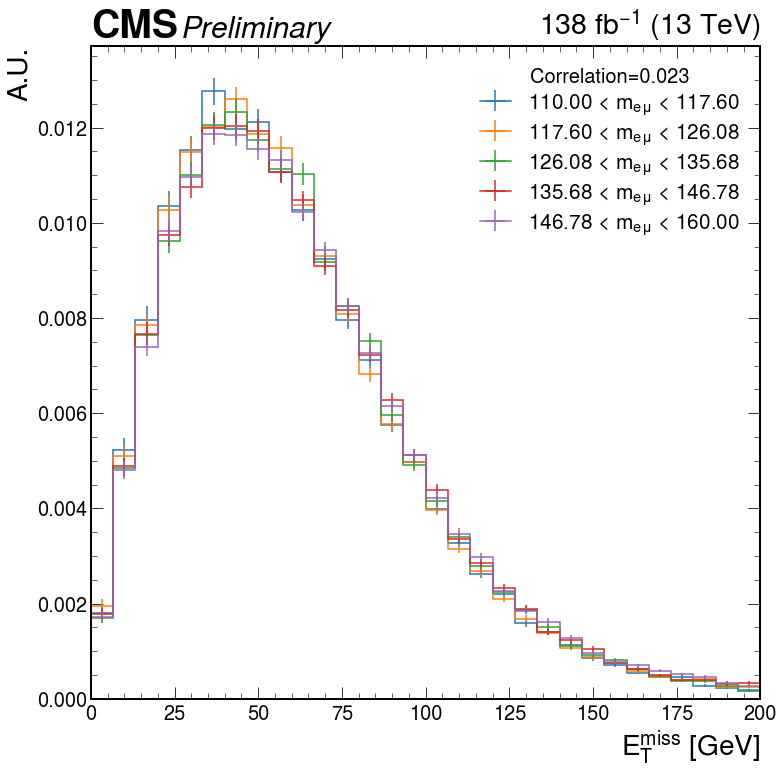

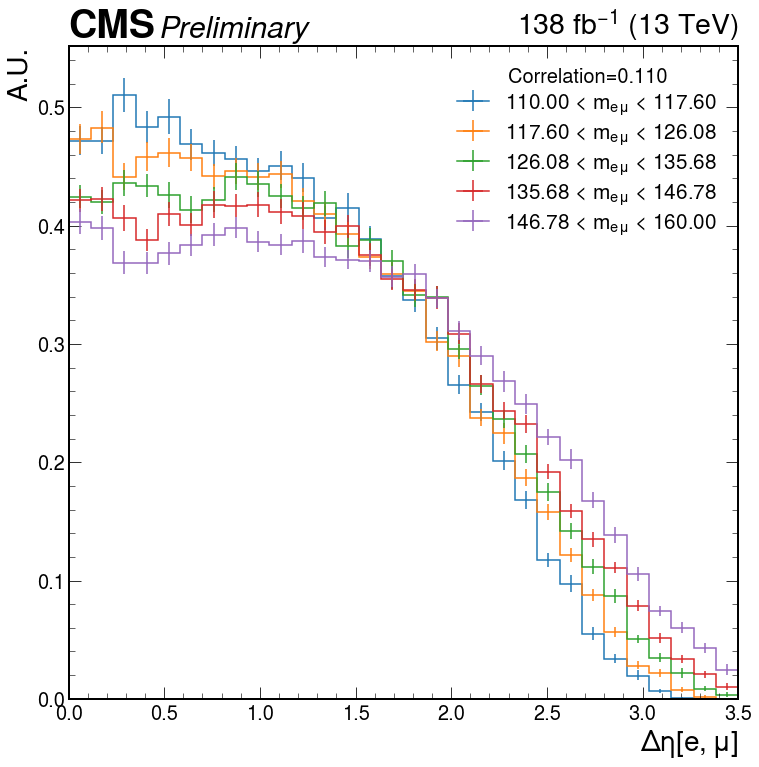

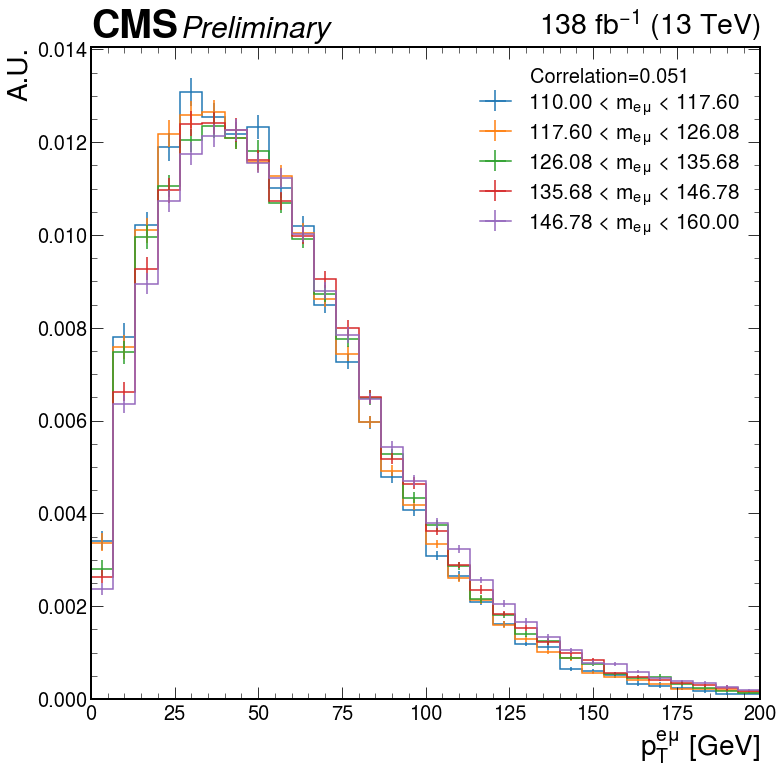

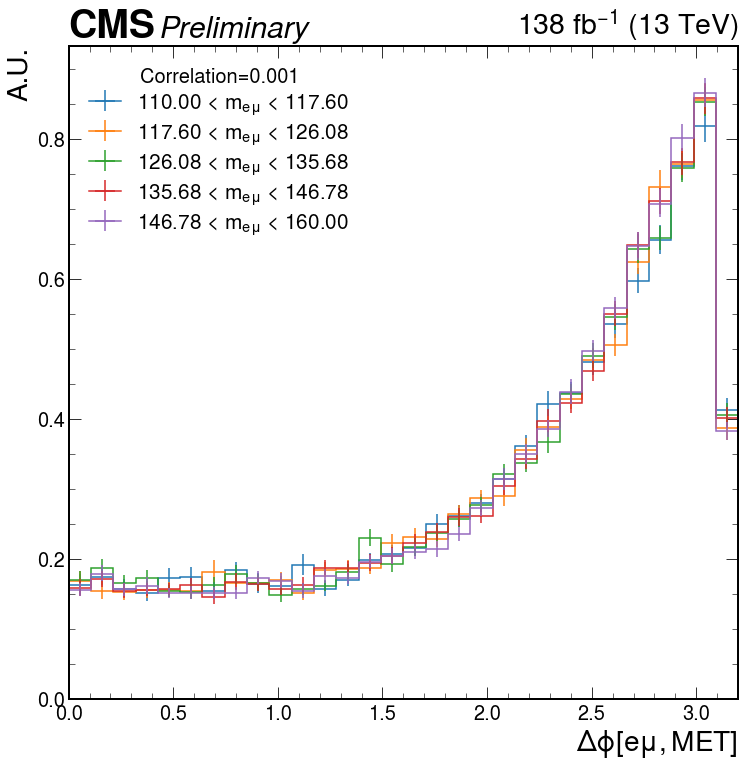

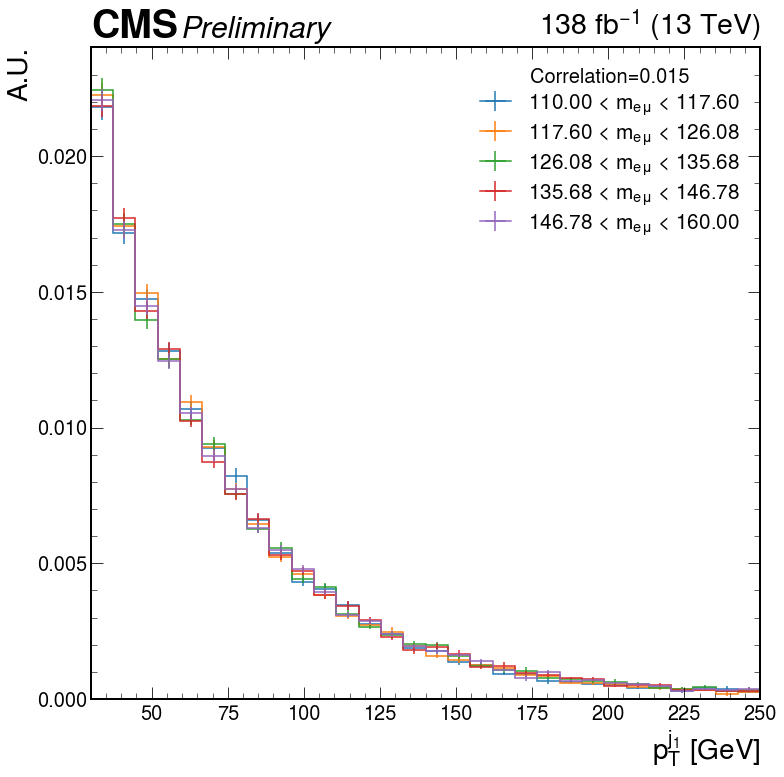

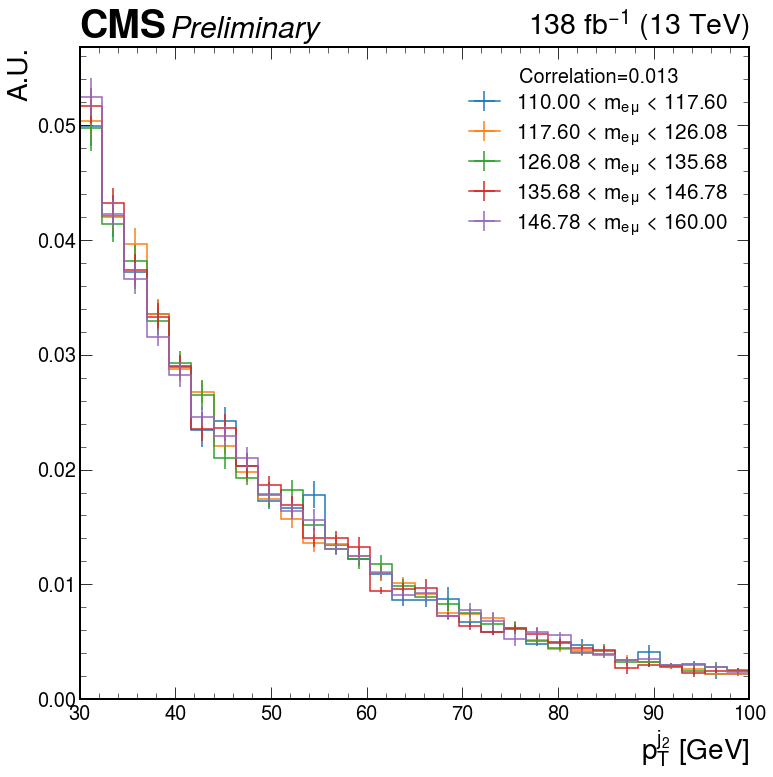

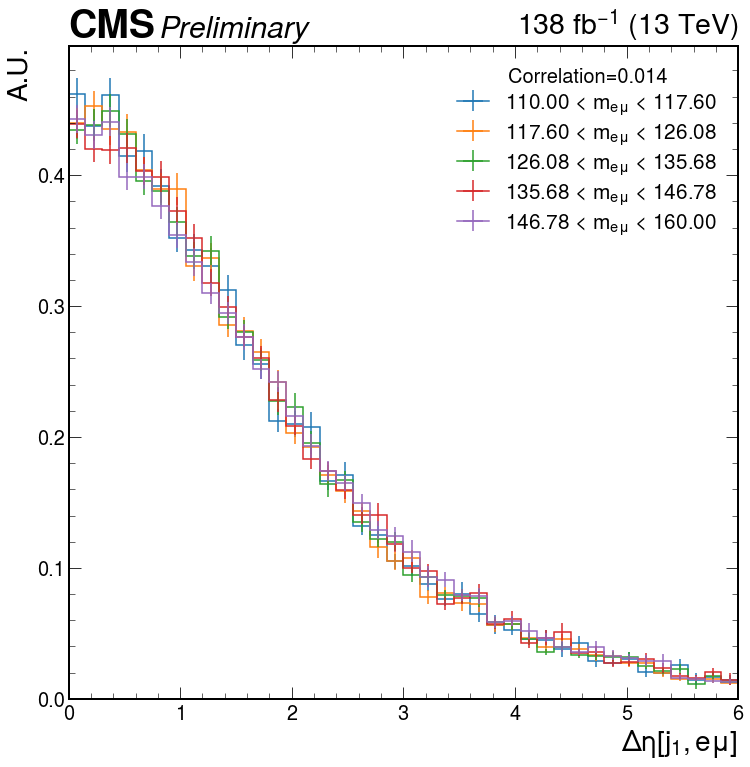

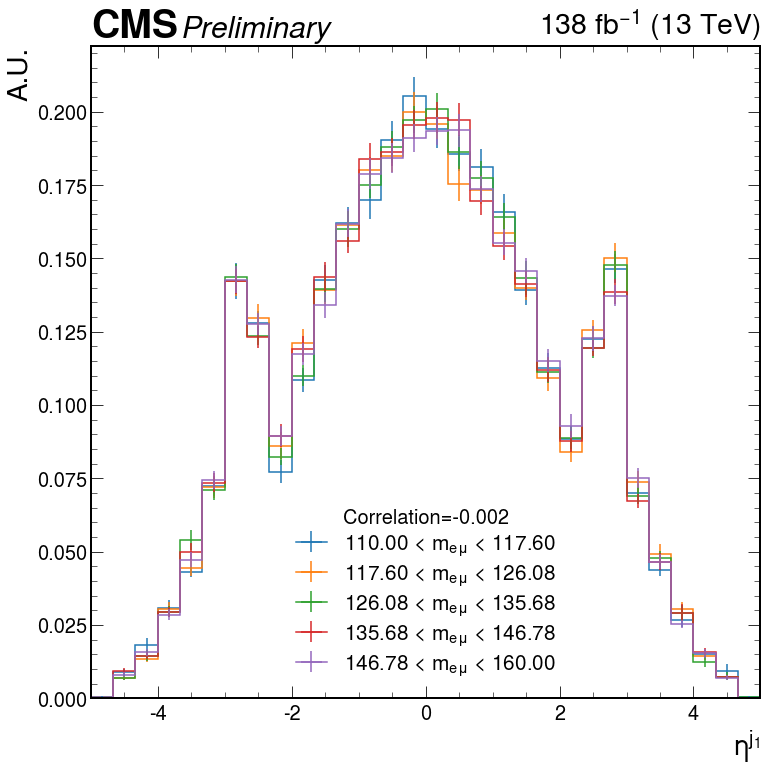

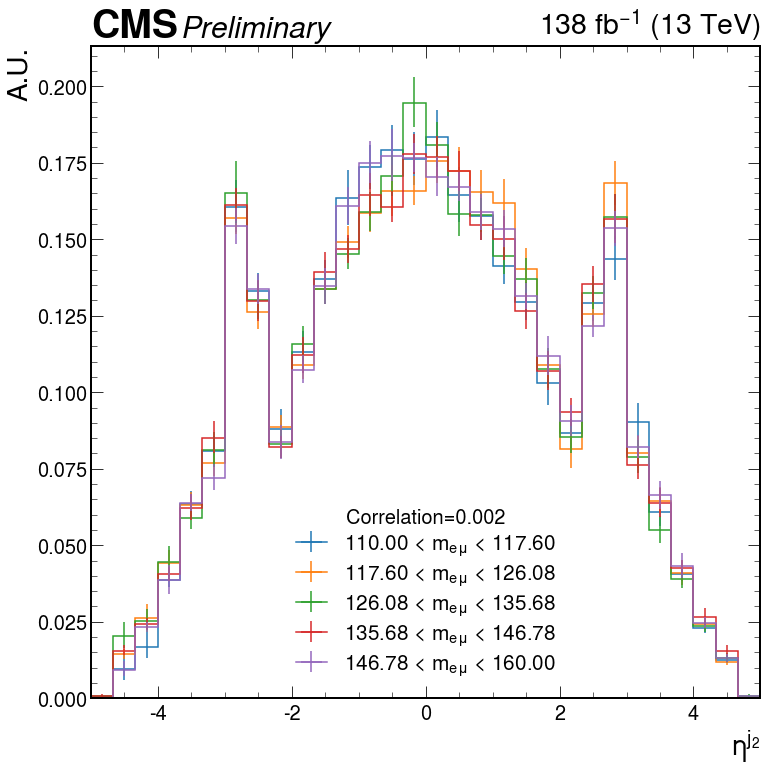

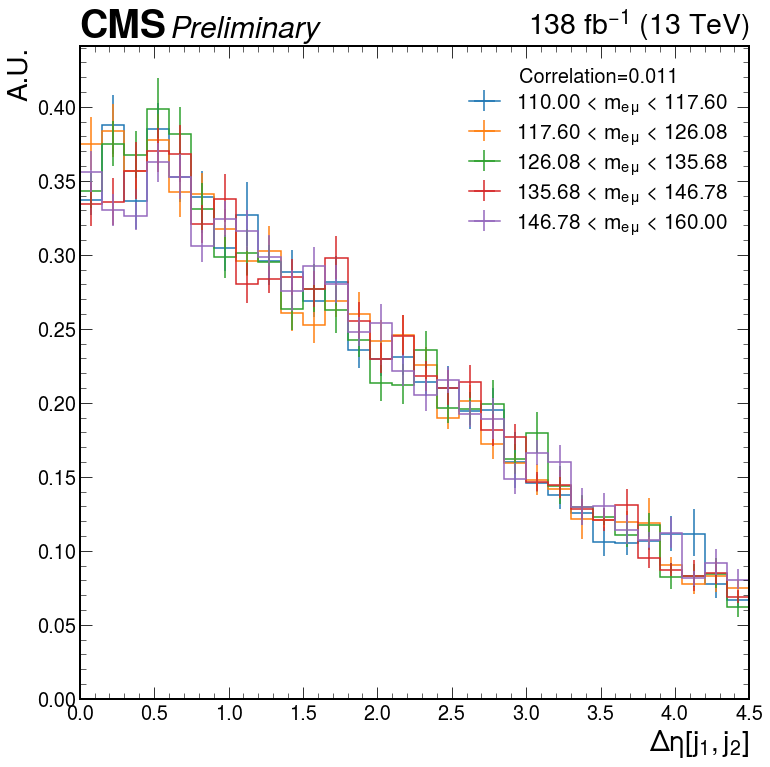

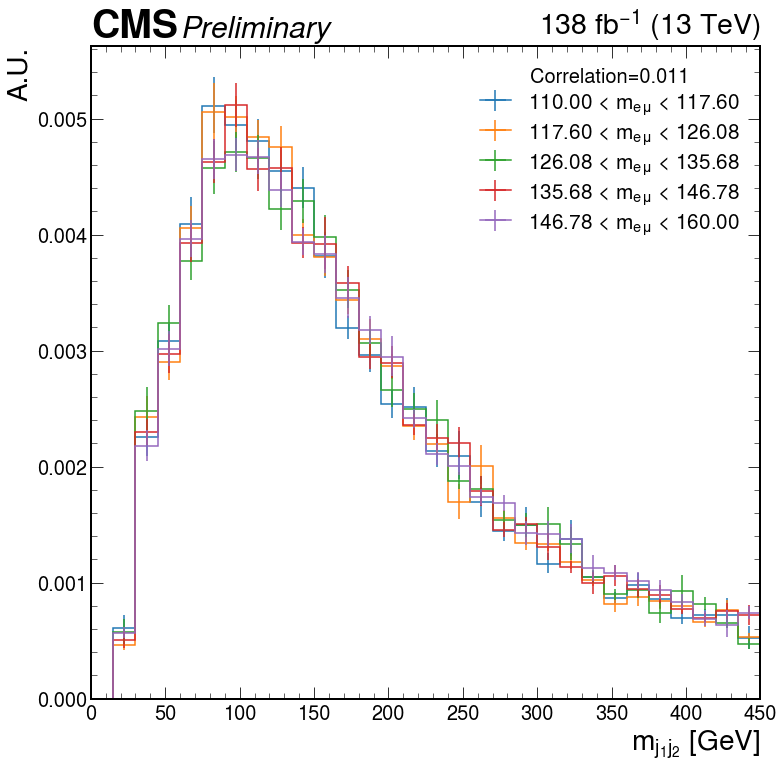

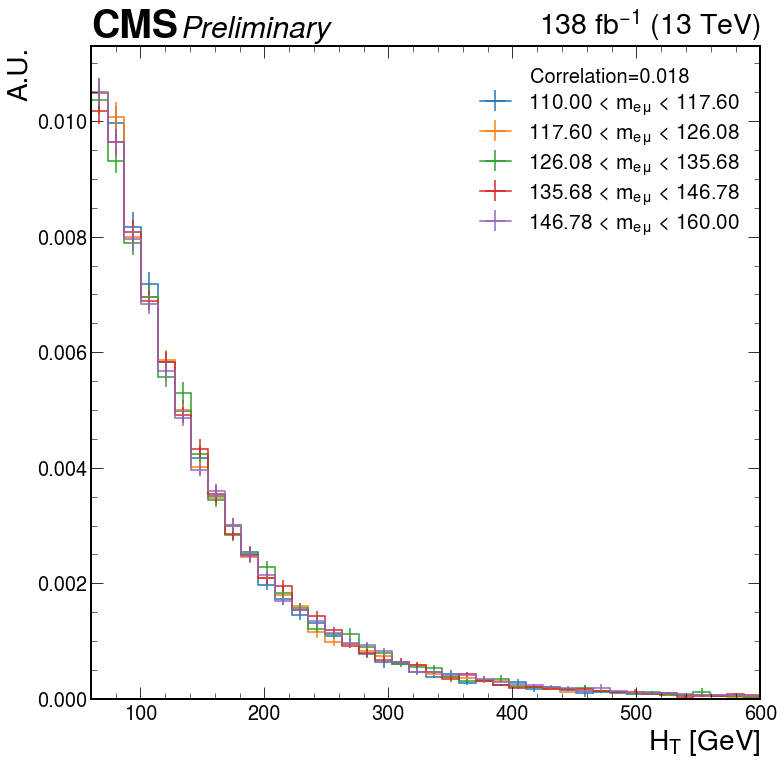

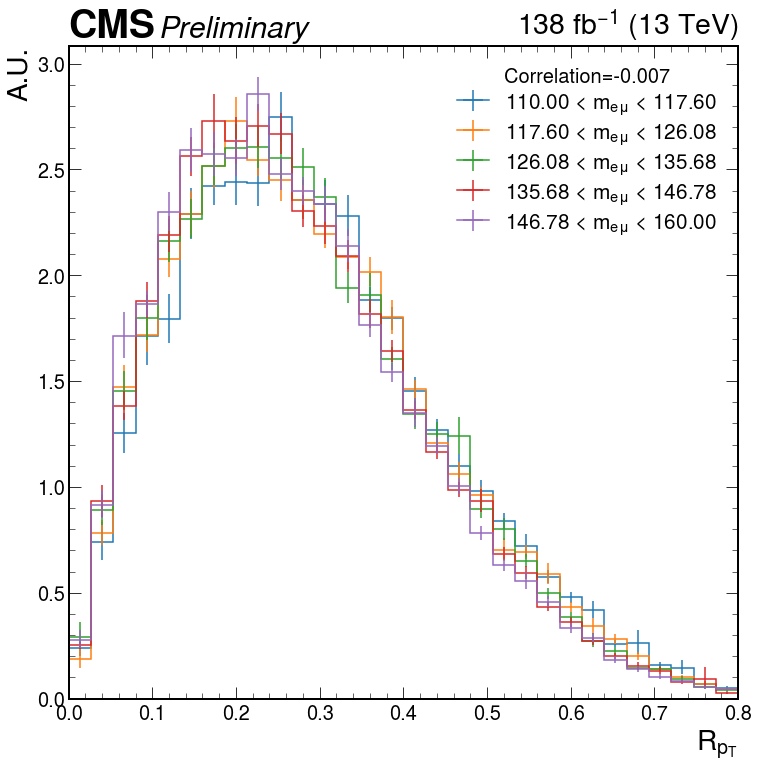

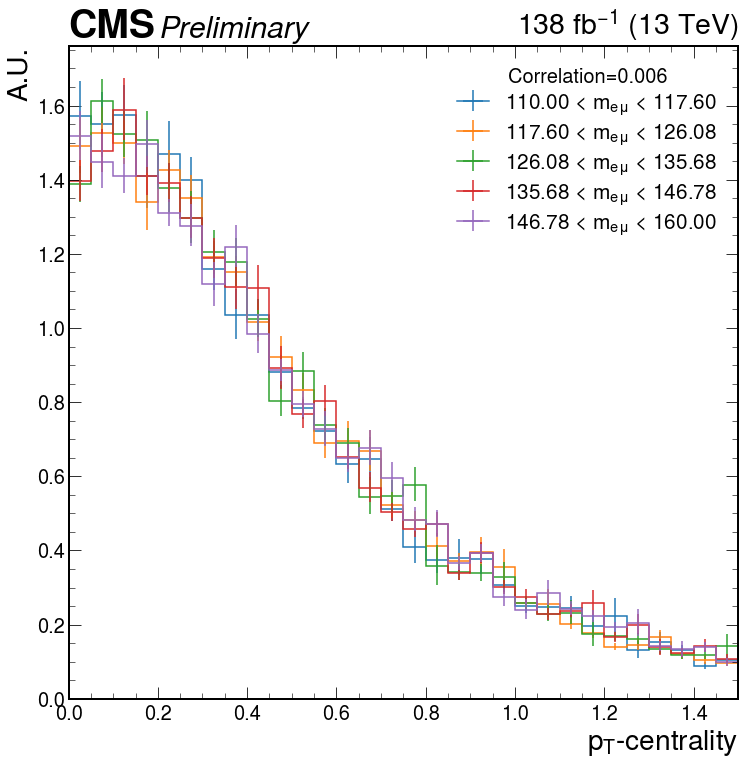

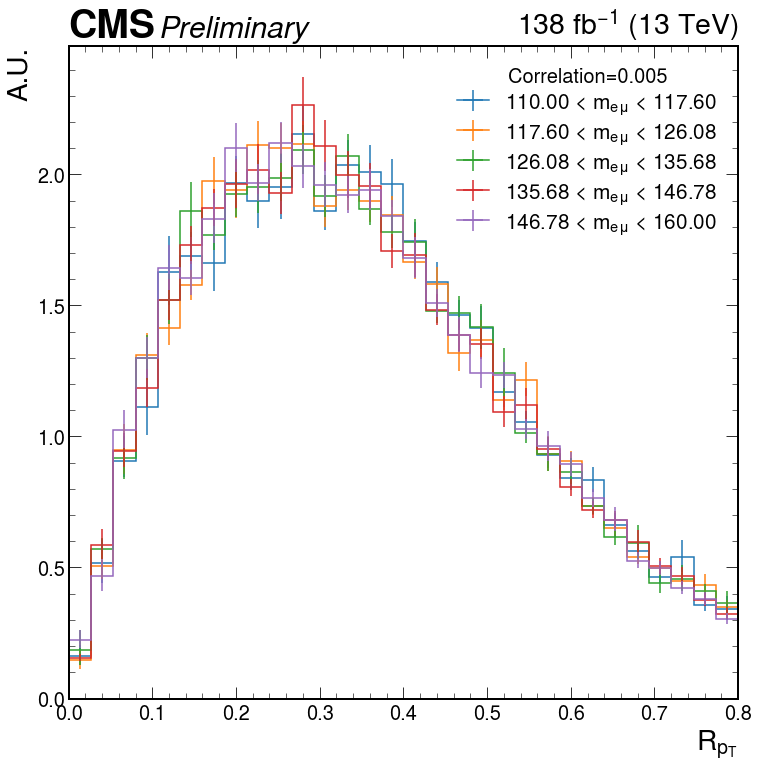

In [11]:
from coffea import hist
import mplhep
import matplotlib.pyplot as plt
%matplotlib inline

#Get 20% quantiles of the background
from statsmodels.stats.weightstats import DescrStatsW
wq = DescrStatsW(data=data_bkg['e_m_Mass'], weights=data_bkg['weight'])
quantiles = wq.quantile(probs=np.array([0, 0.20, 0.40, 0.60, 0.80, 1]), return_pandas=False)
for feature_name in feature_names:
    h_quan = hist.Hist('A.U.', hist.Bin(feature_name, features_map[feature_name][0], features_map[feature_name][1], features_map[feature_name][2], features_map[feature_name][3]), hist.Cat("sample", "sample"))
    for i in range(len(quantiles)-1):
        #Fill in sliced invariant mass according to MVA quantiles
        quant25 = data_bkg[(data_bkg['e_m_Mass']<quantiles[i+1])&(data_bkg['e_m_Mass']>=quantiles[i])]
        label = f'{quantiles[i]:.2f} <'+' $m_{e\mu}$ '+f'< {quantiles[i+1]:.2f}'
        args = {feature_name:quant25[feature_name].to_numpy(), 'sample':label, 'weight':quant25['weight'].to_numpy()}
        h_quan.fill(**args)
        #scales[label] = 1/np.sum(quant25['weight'].to_numpy())

    #h_quan.scale(scales, axis='sample')

    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.title_fontsize': 20
    })

    fig = plt.figure(
            figsize=(12,12),
          )

    ax = hist.plot1d(h_quan, density=True)
    #ax.set_ylim(0, 0.05)
    leg = ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split(' < ')[0])))
    leg = ax.legend(handles, labels, fontsize='x-small', labelspacing=0.25, title=f"Correlation={corr(data_bkg[feature_name], data_bkg['e_m_Mass'], data_bkg['weight']):.3f}")
    plt.setp(leg.get_title(), multialignment='center')
#    plt.setp(leg.get_texts(), multialignment='center')
#     for t in leg.get_texts():
#         t.set_ha('right')

    lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
    #fig.savefig(f'plots/BDTValid/{catcatcat}_bkg.png')

/tmp/ipykernel_1397975/3540898616.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(


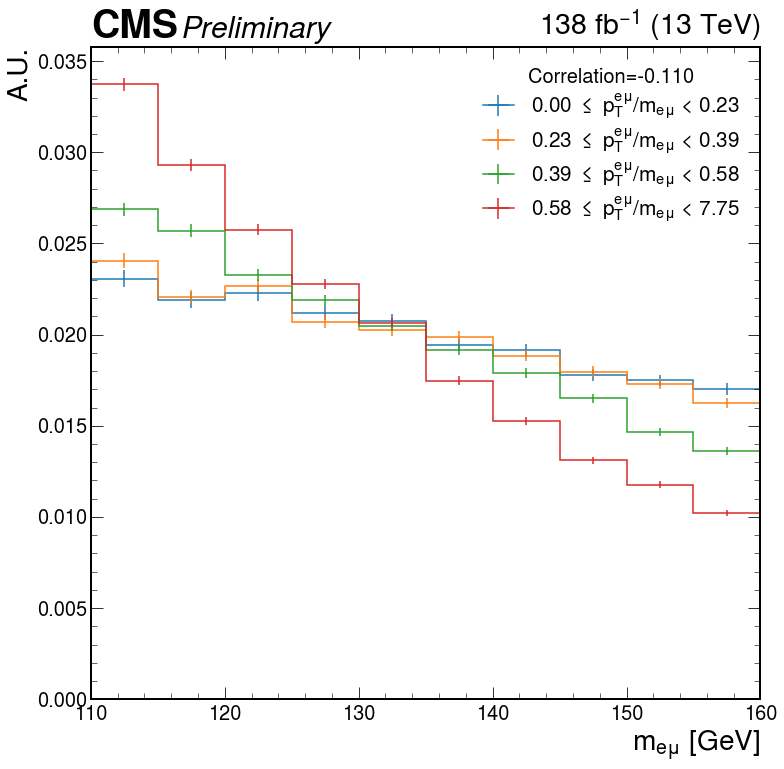

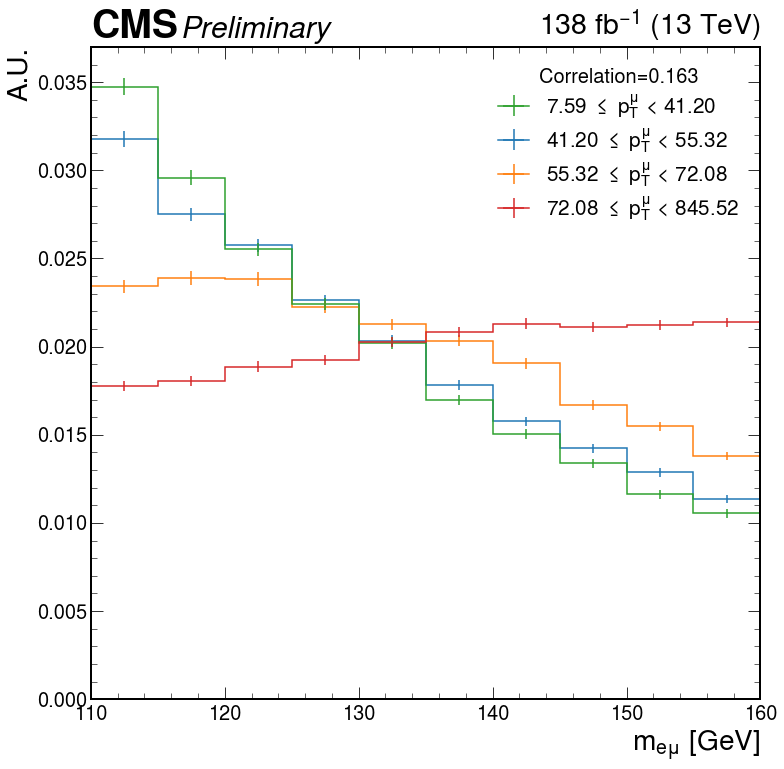

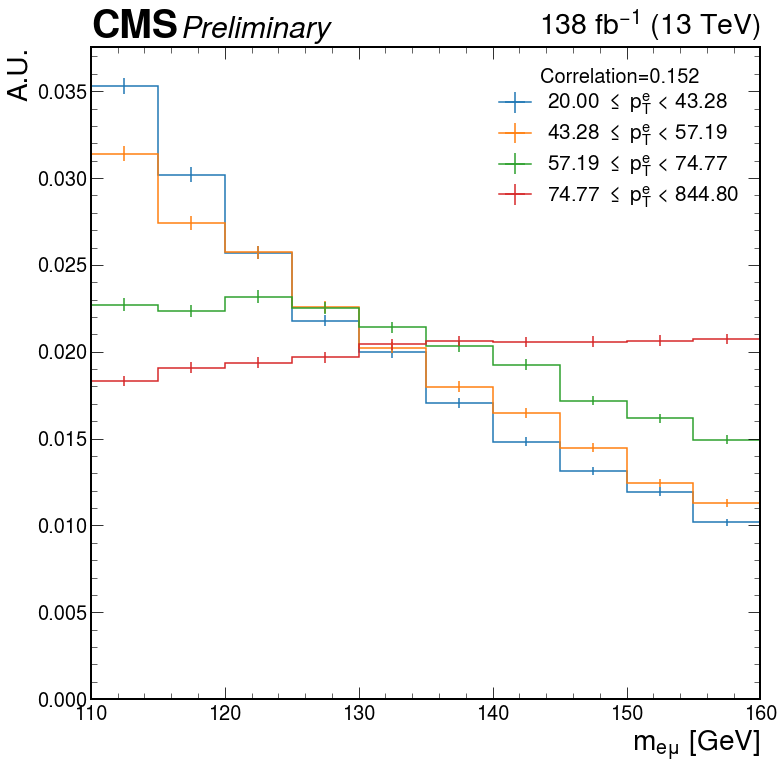

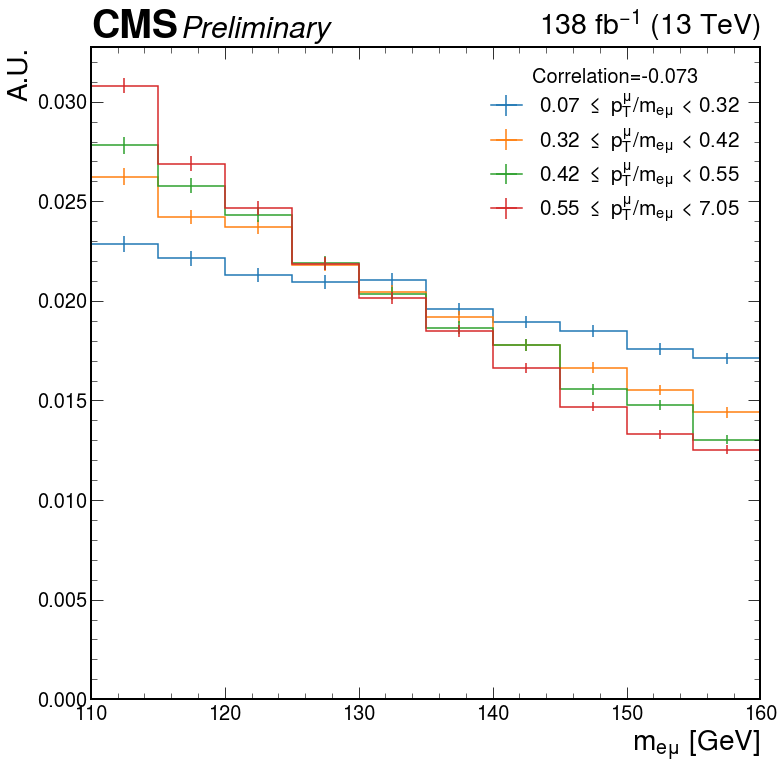

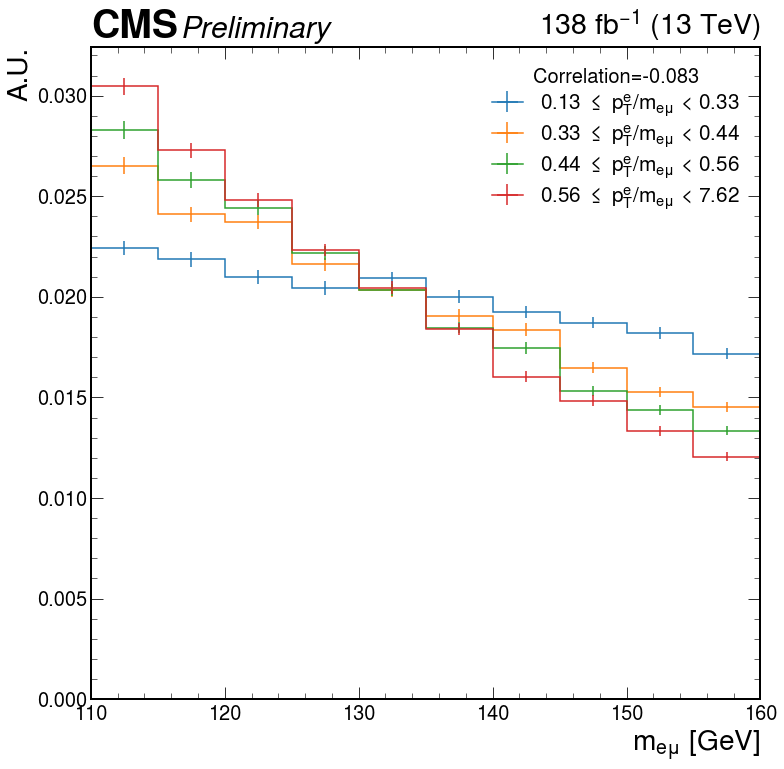

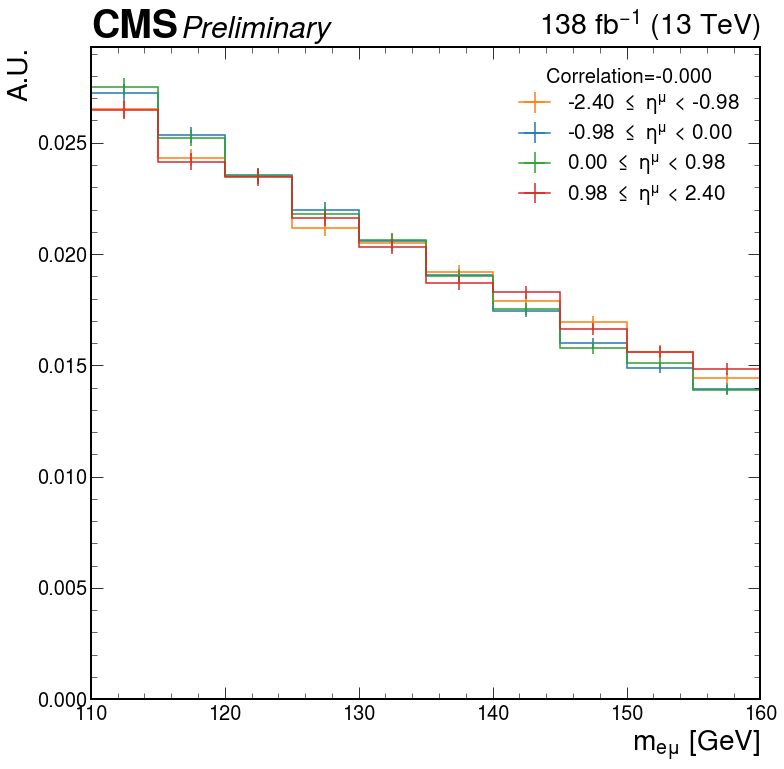

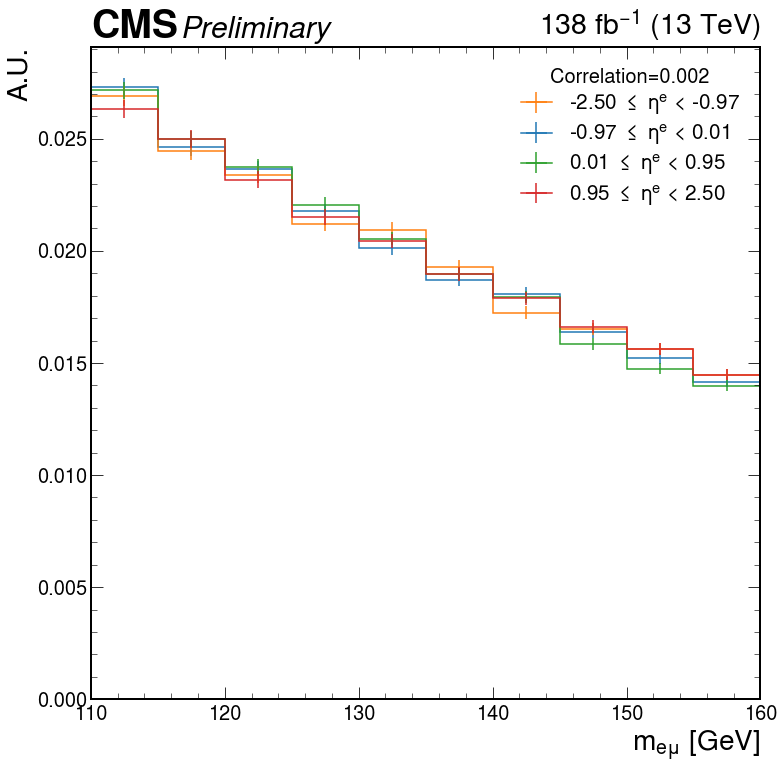

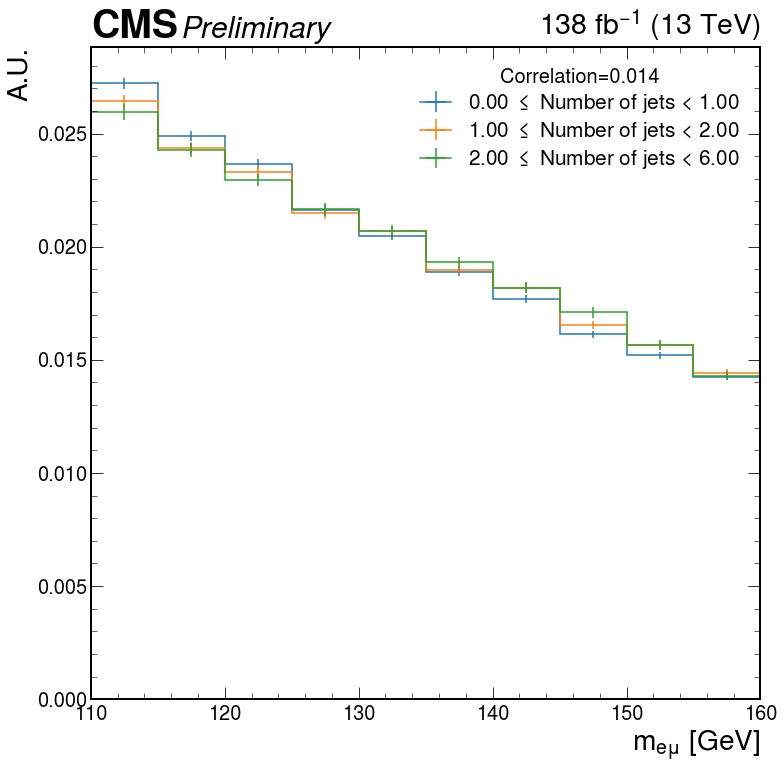

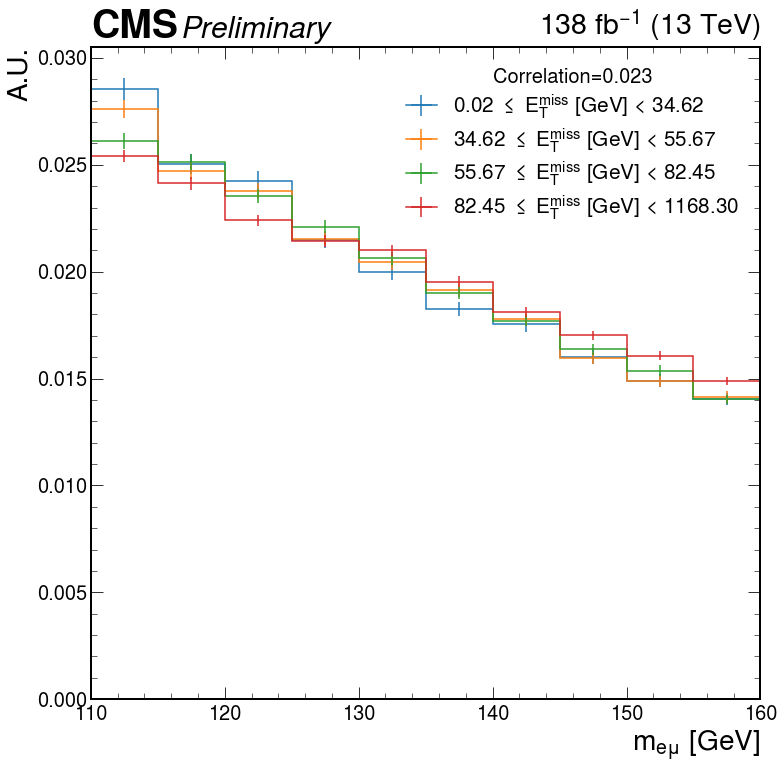

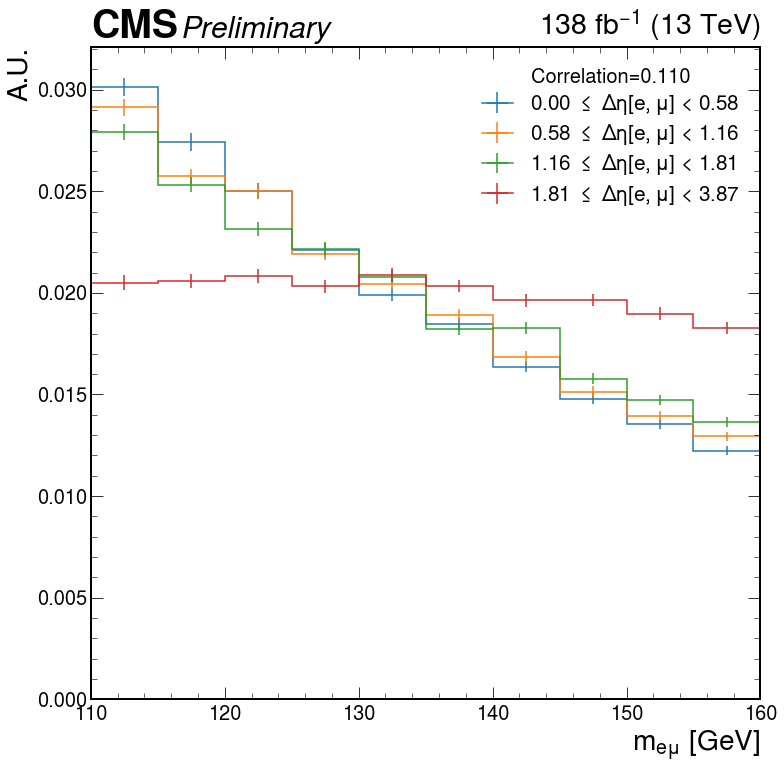

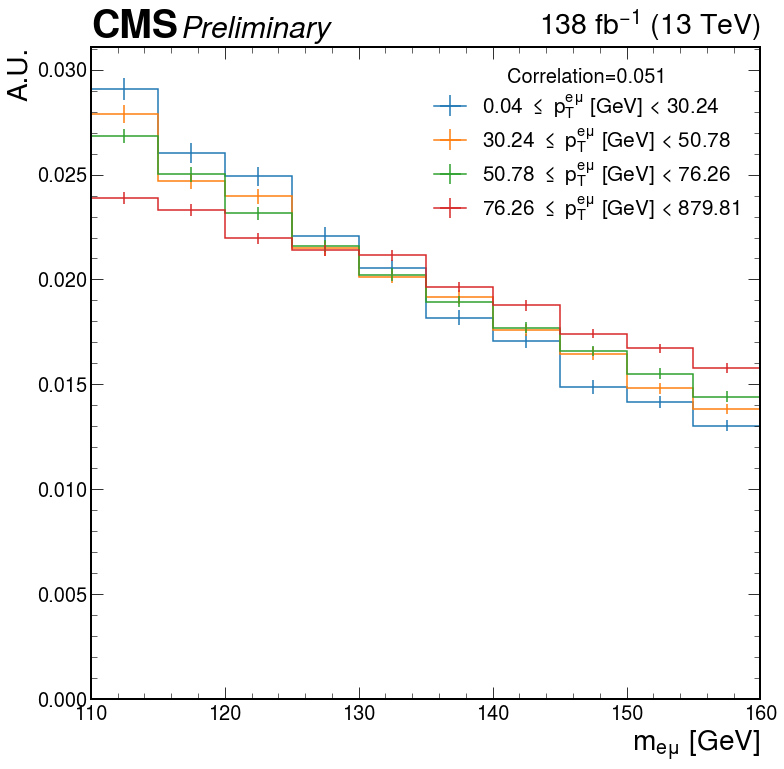

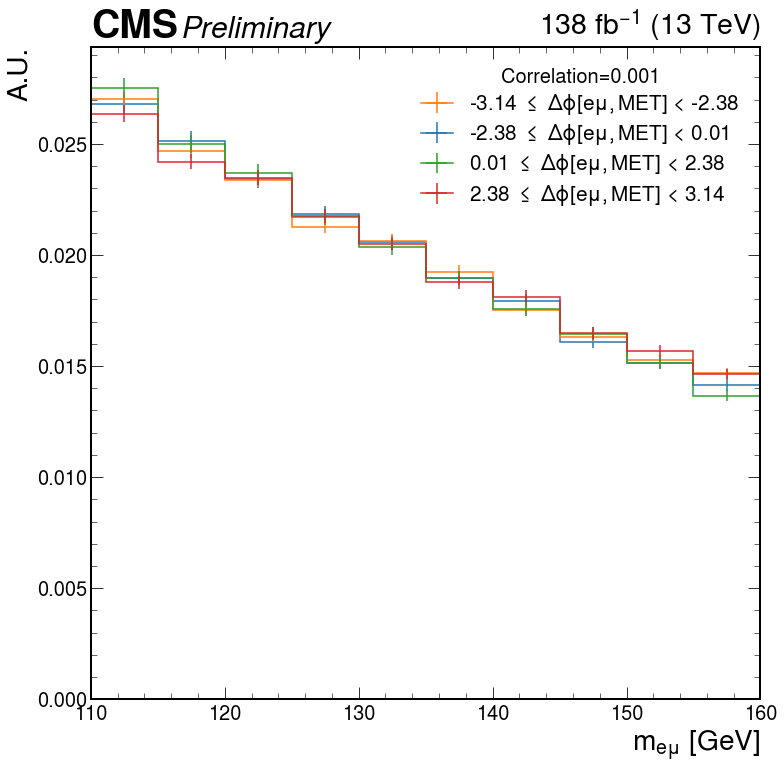

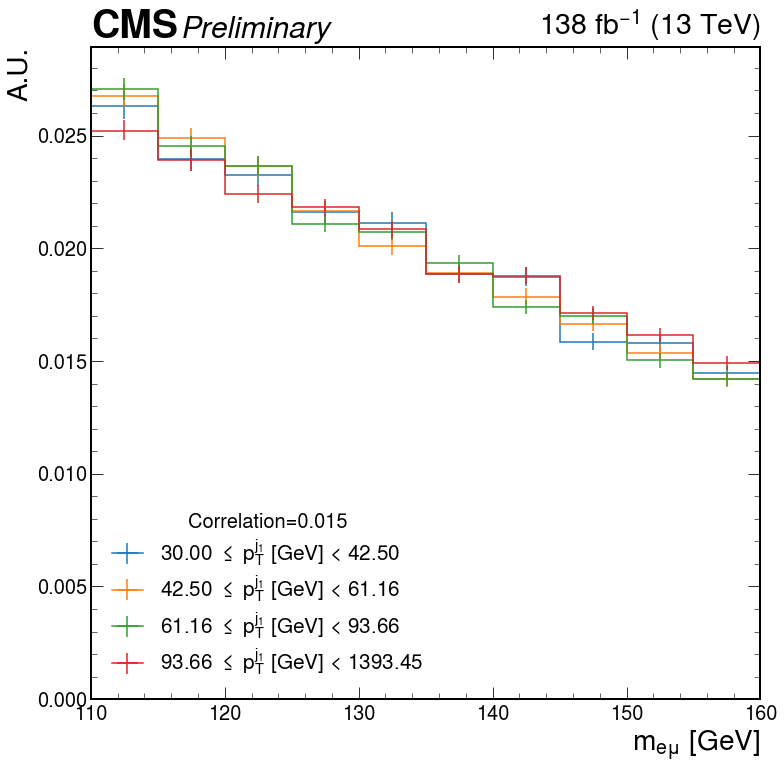

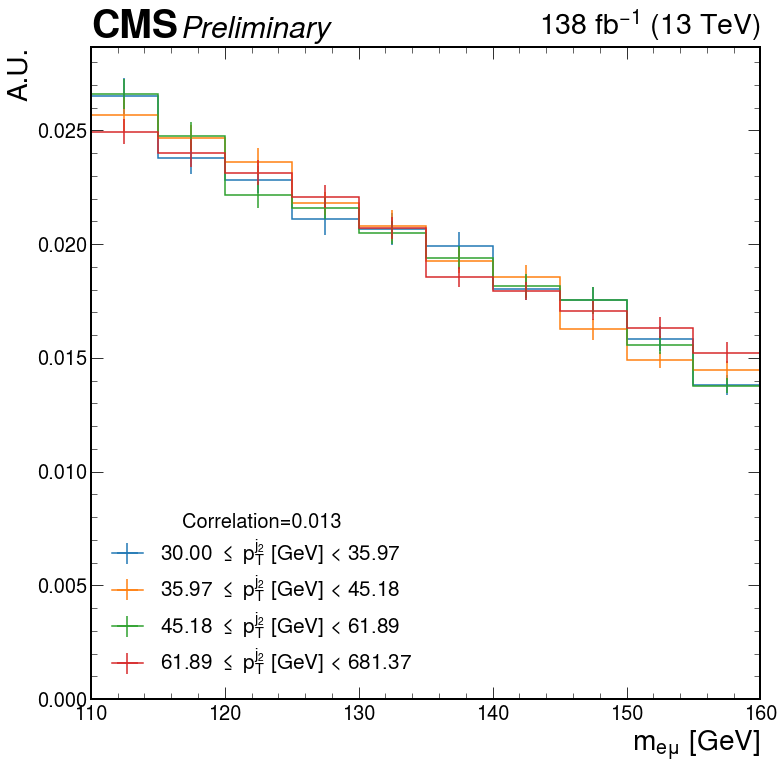

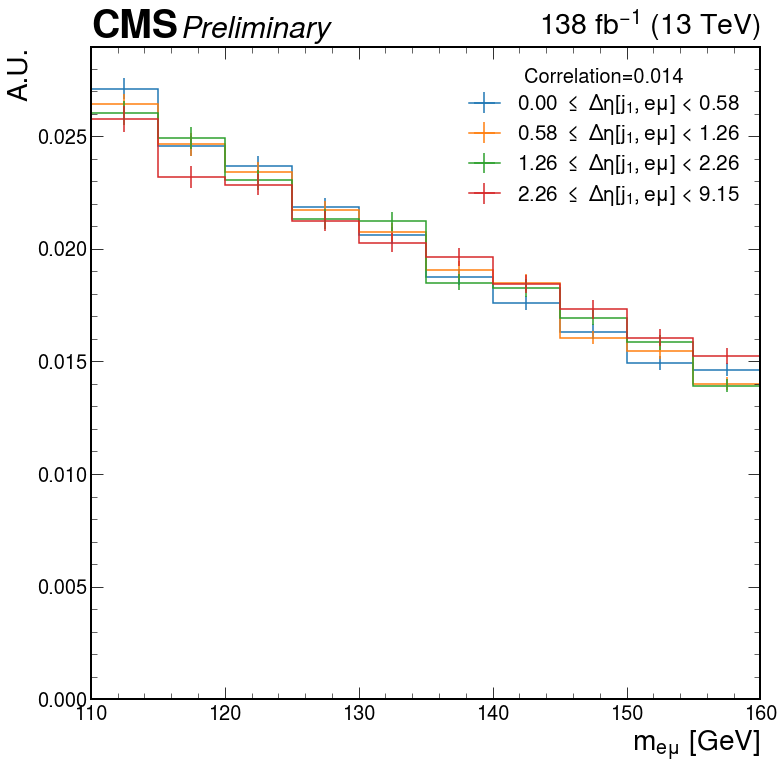

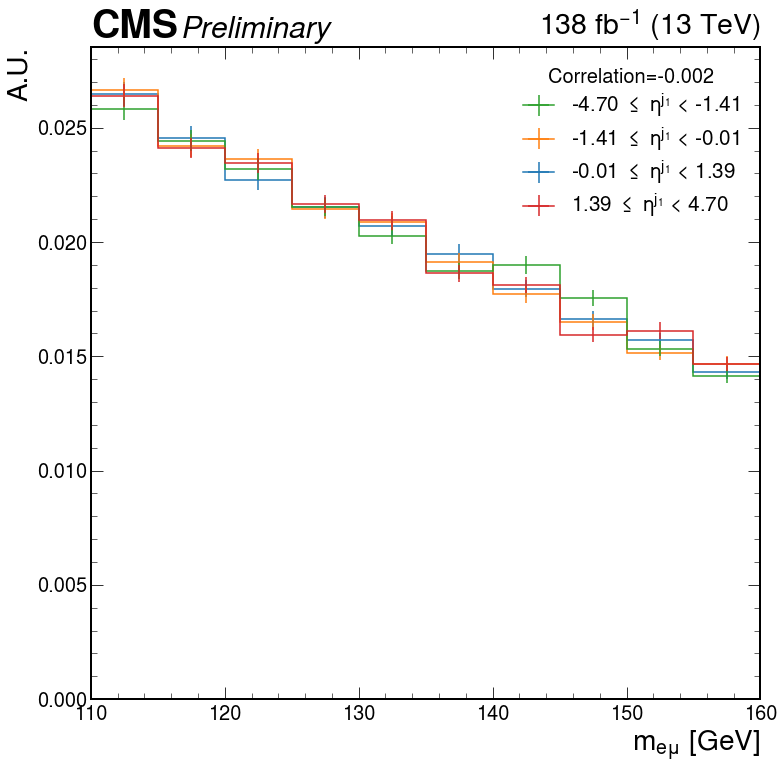

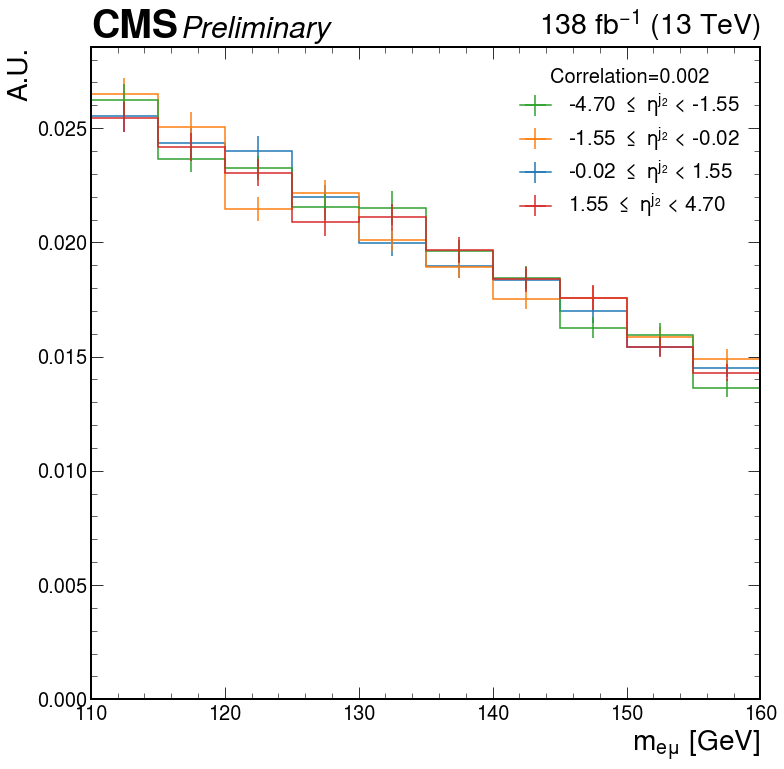

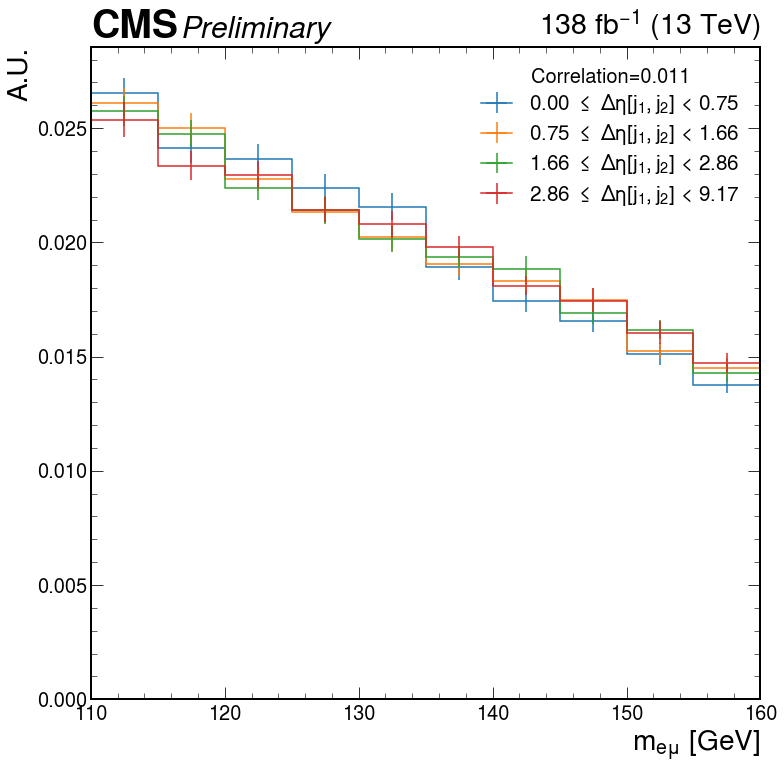

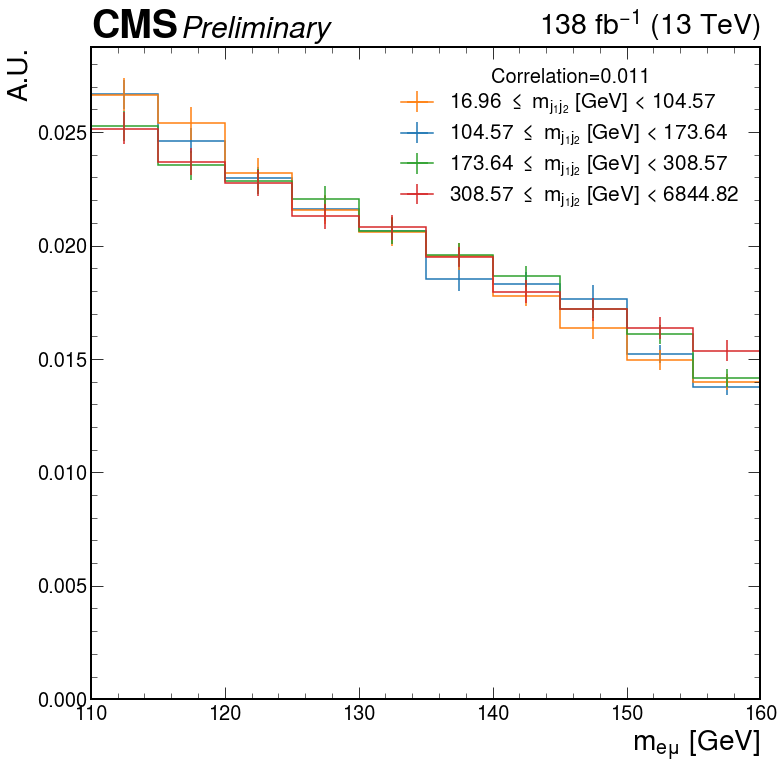

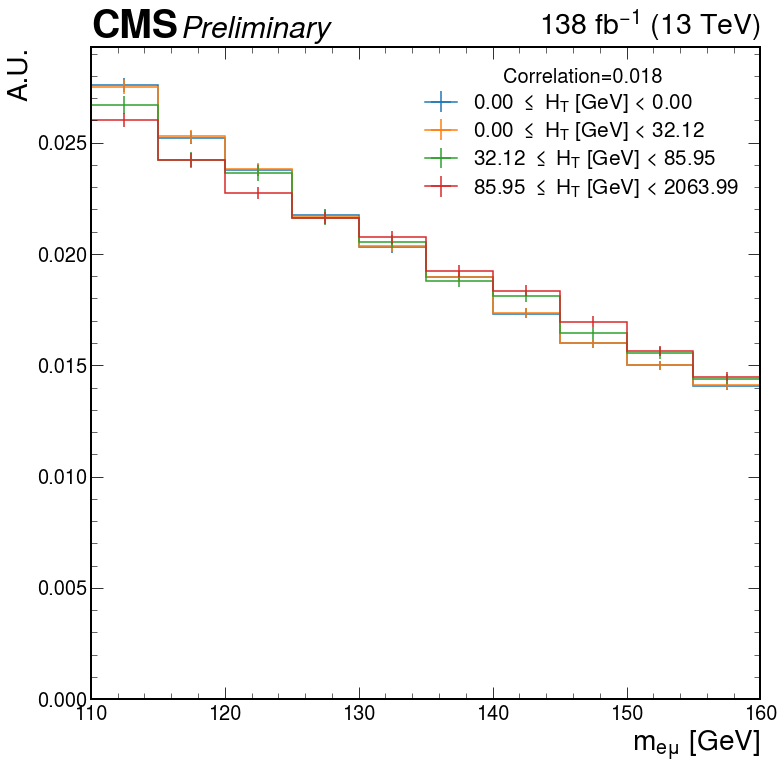

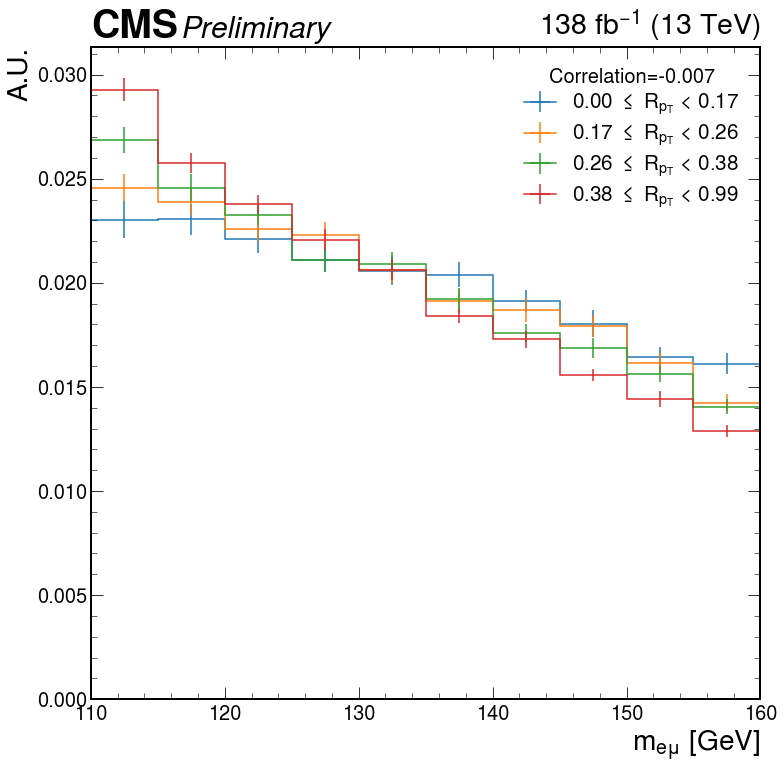

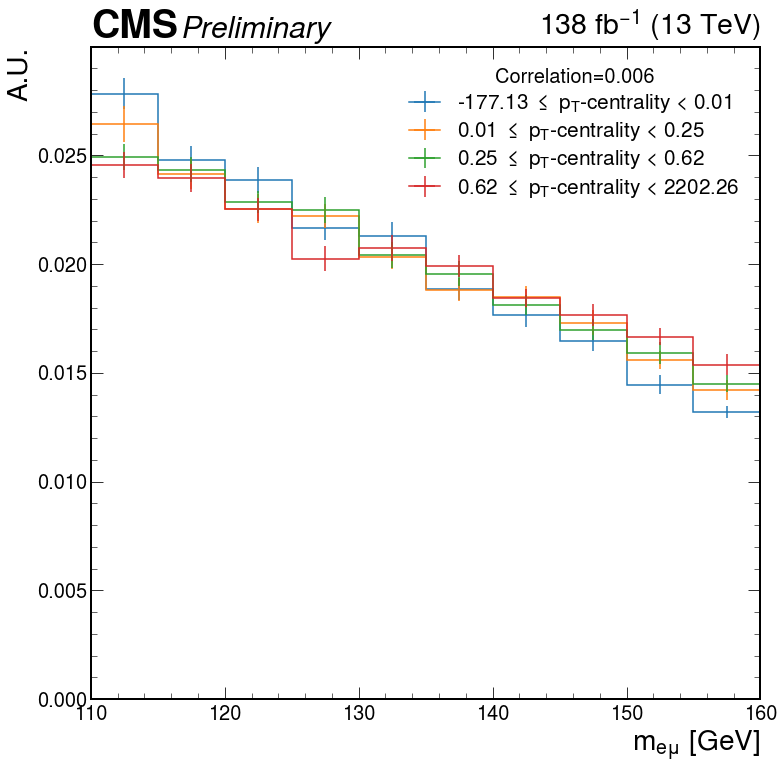

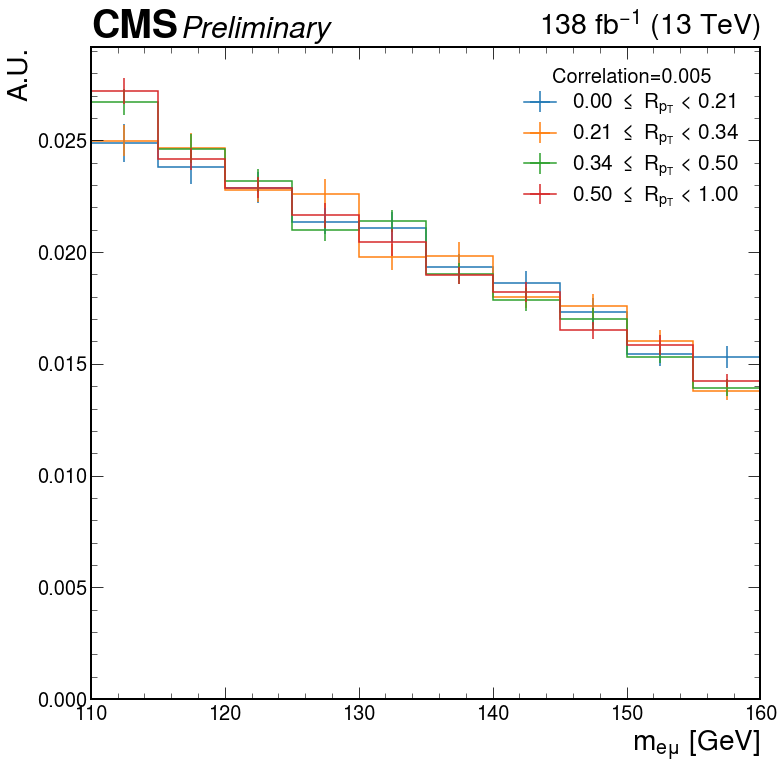

In [17]:
from coffea import hist
import mplhep
import matplotlib.pyplot as plt
%matplotlib inline

#Get 20% quantiles of the background
from statsmodels.stats.weightstats import DescrStatsW

for feature_name in feature_names:
    data_sub = data_bkg[[feature_name, 'e_m_Mass', 'weight']]
    wq = DescrStatsW(data=data_bkg[feature_name], weights=data_bkg['weight'])
    h_quan = hist.Hist('A.U.', hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 10, 110, 160), hist.Cat("sample", "sample"))
    quantiles = wq.quantile(probs=np.array([0, 0.25, 0.50, 0.75, 1]), return_pandas=False)
    if feature_name=='njets': quantiles=[0,1,2,6]
    for i in range(len(quantiles)-1):
        #Fill in sliced invariant mass according to MVA quantiles
        quant25 = data_sub[(data_sub[feature_name]<=quantiles[i+1])&(data_sub[feature_name]>=quantiles[i])]
        label = f'{quantiles[i]:.2f} $\leq$ {features_map[feature_name][0]} < {quantiles[i+1]:.2f}'
        h_quan.fill(e_m_Mass=quant25['e_m_Mass'].to_numpy(), sample=label, weight=quant25['weight'].to_numpy())
        #scales[label] = 1/np.sum(quant25['weight'].to_numpy())

    #h_quan.scale(scales, axis='sample')

    plt.style.use(mplhep.style.CMS)
    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.title_fontsize': 20
    })

    fig = plt.figure(
            figsize=(12,12),
          )

    ax = hist.plot1d(h_quan, density=True)
    #ax.set_ylim(0, 0.05)
    leg = ax.legend()
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split(' $\leq$ ')[0])))
    leg = ax.legend(handles, labels, fontsize='x-small', labelspacing=0.25, title=f"Correlation={corr(data_bkg[feature_name], data_bkg['e_m_Mass'], data_bkg['weight']):.3f}")
    plt.setp(leg.get_title(), multialignment='center')
#    plt.setp(leg.get_texts(), multialignment='center')
#     for t in leg.get_texts():
#         t.set_ha('right')

    lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
    fig.savefig(f'plots/Correlations/{feature_name}_bkg.png')